### Installation of libraries (if needed)

In [3853]:

# Installing pip...



# !pip install pandas
# !pip install statsmodels
# !pip install scikit-learn
# !pip install keras
# !pip install tensorflow





In [3854]:
# import needful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy.stats as scistat
import sklearn as sk


# Partition data into training and testing set
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import plot_roc_curve

from sklearn.metrics import roc_auc_score



# Import metrics module for performance evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score





from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import wilcoxon


from keras.models import Sequential
from keras.layers import Dense



In [3855]:

# We have created a module able to take the Stata folder, 
# to detect the extension of the .DTA file of the database, 
# to go to the .DO dictionary file, 
# to take the labels of the variables and modalities, 
# and to replace them respectively in the STATA database.



class ReadStataFile:
    def __init__(self,folder_name):
        self.folder_name= folder_name
        self.__load_columns__()

    def __load_columns__(self):
      
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        labels = {}
        for line in lines[2:]:
            if line != "#delimit ;" and len(line.strip()) >0 :
                my_split = line.split('\"')
                my_var = my_split[0].replace("label variable","").strip()
                my_label = my_split[1].strip()
                labels[my_var]=my_label
            
            else:
                break;
        self.variables = labels.keys()
        self.labels = labels.values()
        self.col_dict =labels
        obj.close()
    
    def get_col_modality(self,variable_name):
        # #delimit cr
      
        folder_name = "HTBR71DT"
        file_name =self.folder_name[0:-2]+"FL"
        obj = open(f"./{self.folder_name}/{file_name}.DO")
        lines = obj.readlines()
        flag_delimiter = 0
        flag_variable_found = 0
        labels ={}
        for line in lines[2:]:
            #print(line)
            if line.lower().strip().find("delimit") >0:
                flag_delimiter = 1
                #print("delimiter found !!!")
            elif line.lower().find(variable_name.lower()) >0 and flag_delimiter == 1:
                flag_variable_found = 1
                #print("variable found !!!")
            elif flag_variable_found == 1 and flag_delimiter == 1 and  line.lower().find(variable_name.lower()) ==-1 and len(line.strip()) >0 and line.strip() != ";" and  len(line.split('\"')) >1   :
                my_split = line.split('\"')    
                my_var_string = my_split[0].strip()
                if self.is_number(my_var_string):
                    my_var = float(my_var_string)
                else:
                    my_var = my_var_string
                my_label = my_split[1].strip()
                labels[my_var]=my_label
                
            
            elif flag_variable_found == 1 and flag_delimiter == 1 and line.strip() == ";" :
                #print("variable not found !!!")
                break;
        obj.close()
        return labels 

    def get_col_label(self,variable_name):
        return self.col_dict.get(variable_name.lower())

    def to_dataframe(self,use_modality=False):
        import pandas as pd
        file_name =self.folder_name[0:-2]+"FL"
        df = pd.read_stata(f"./{self.folder_name}/{file_name}.DTA",convert_categoricals=False)
        if  use_modality:
          for col in self.variables:
              my_dict = self.get_col_modality(col)
              df[col].replace(my_dict,inplace=True)
        df.rename(columns=self.col_dict,inplace=True)
        return df

    def is_number(self,string):
        try:
            float(string)
            return True
        except ValueError:
            return False


In [3856]:
children_under_five = ReadStataFile("HTKR71DT")

In [3857]:
data = children_under_five.to_dataframe(use_modality=True)

In [3858]:
data.head(30)

,Case Identification,Index to Birth History,Country code and phase,Cluster number,Household number,Respondent's line number,Ultimate area unit,Women's individual sample weight (6 decimals),Month of interview,Year of interview,...,Child knows or can name at least ten letters from the alphabet,Child can read at least four simple words,Child can name or recognize all the number from 1 to 10,Child can pick small object from the ground with two fingers,Sometimes child is too ill to play,Child is capable to follow simple instructions to do something correctly,Child can do something independently,Child can go along with other children with no problems,"Child kicks, bites or slaps other children or adults",Child is easily distracted
0,1 17 2,1,HT7,1,17,2,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 23 5,1,HT7,1,23,5,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 23 5,2,HT7,1,23,5,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 40 2,1,HT7,1,40,2,1,1140608,3,2017,...,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No
4,1 40 2,2,HT7,1,40,2,1,1140608,3,2017,...,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No
5,1 40 2,3,HT7,1,40,2,1,1140608,3,2017,...,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No
6,1 46 2,1,HT7,1,46,2,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1 48 1,1,HT7,1,48,1,1,1140608,3,2017,...,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No
8,1 53 2,1,HT7,1,53,2,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1 82 3,1,HT7,1,82,3,1,1140608,3,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3859]:
print(data.shape)

(6530, 1216)


#### We have 1216 columns. We will choose the determinants that could best explain Under Five Mortality

cols_selected:



        [ "Year of interview", 
        "Region", 
        "Respondent's year of birth",
        "Age in 5-year groups", 
        "Type of place of residence", 
        "Highest educational level", 
        "Relationship to household head", 
        "Educational attainment", 
        "Number of children 5 and under in household (de jure)", 
        "Date of first birth (CMC)", 
        "Age of respondent at 1st birth", 
        "Number of living children", 
        "Size of child at birth", 
        "Women's age in years (from household questionnaire)", 
        "Under age 18 (from household questionnaire)", 
        "Marital status", 
        "Current marital status", 
        "Type of toilet facility", "Place of delivery", 
        "Delivery by caesarean section", 
        "Wealth index combined", 
        "Child's age in months", 
        "Wealth index factor score combined (5 decimals)", 
        "Wealth index for urban/rural", 
        "Body Mass Index", 
        "Births in last five years"
        "Baby postnatal check within 2 months", 
        "Sex of child", 
        "Age of respondent at 1st birth", 
        "Birth order number", 
        "Women's age in years (from household questionnaire)", 
        "Time to get to water source",
        "Source of drinking water", 
        "Wanted last child", 
        "Current contraceptive method", 
        "Place of delivery", 
        "Number of antenatal visits during pregnancy", 
        "Marital status", 
        "When child put to breast", 
        "Type of place of residence", 
        "When child put to breast", 
        "Wealth index factor score for urban/rural (5 decimals)" , 
        "Total children ever born", 
        "Births in last five years", 
        "Births in past year", 
        "Births in month of interview", 
        "Date of first birth (CMC)", 
        "Age of respondent at 1st birth", 
        "Currently pregnant", 
        "Number of living children", 
        "Marriage to first birth interval (months)", 
        "Births in last three years", 
        "Current marital status", 
        "Currently/formerly/never in union", 
        "Currently residing with husband/partner", 
        "Birth column number", 
        "Birth order number", 
        "Year of birth", 
        "Date of birth (CMC)", 
        "Sex of child", 
        "Child is alive", 
        "Age at death", 
        "Age at death (months, imputed)", 
        "Current age of child", 
        "Child lives with whom",  
        "Preceding birth interval (months)", 
        "Child's line number in household", 
        "Current age of child in months (months since birth for dead children)", 
        "Size of child at birth", 
        "Birth weight in kilograms (3 decimals)"]

In [3860]:
# we select the colomns

cols_selected = ["Year of interview", "Region", "Births in last five years", "Respondent's year of birth","Age in 5-year groups", "Type of place of residence", "Highest educational level", "Relationship to household head", "Educational attainment", "Number of children 5 and under in household (de jure)", "Date of first birth (CMC)", "Age of respondent at 1st birth", "Number of living children", "Size of child at birth", "Women's age in years (from household questionnaire)", "Under age 18 (from household questionnaire)", "Marital status", "Current marital status", "Type of toilet facility", "Place of delivery", "Delivery by caesarean section", "Wealth index combined", "Child's age in months", "Wealth index factor score combined (5 decimals)", "Wealth index for urban/rural", "Body Mass Index", "Baby postnatal check within 2 months", "Sex of child", "Age of respondent at 1st birth", "Birth order number", "Women's age in years (from household questionnaire)", "Time to get to water source","Source of drinking water", "Wanted last child", "Current contraceptive method", "Place of delivery", "Number of antenatal visits during pregnancy", "Marital status", "When child put to breast", "Type of place of residence", "When child put to breast", "Wealth index factor score for urban/rural (5 decimals)" , "Total children ever born", "Births in last five years", "Births in past year", "Births in month of interview", "Date of first birth (CMC)", "Age of respondent at 1st birth", "Currently pregnant", "Number of living children", "Marriage to first birth interval (months)", "Births in last three years", "Current marital status", "Currently/formerly/never in union", "Currently residing with husband/partner", "Birth column number", "Birth order number", "Year of birth", "Date of birth (CMC)", "Sex of child", "Child is alive", "Age at death", "Age at death (months, imputed)", "Current age of child", "Child lives with whom",  "Preceding birth interval (months)", "Child's line number in household", "Current age of child in months (months since birth for dead children)", "Size of child at birth", "Birth weight in kilograms (3 decimals)", "Number of household members (listed)"]
data_selected = data[set(cols_selected)]

In [3861]:
#data_selected.drop_duplicates().shape[0]

In [3862]:
print(data_selected.shape)

(6530, 58)


## Data Cleaning


### Among all columns with the modality "Not a dejure resident", 152 same rows observe this modality. These 152 observations should be eliminated for lack of credibility.

In [3863]:
# drop rows that contain specific 'value': "Don't know" & "Not a dejure resident" in 'column_name':  "Time to get to water source"

data_selected = data_selected[(data_selected["Time to get to water source"]!= "Not a dejure resident") & (data_selected["Time to get to water source"]!= "Don't know")]

In [3864]:
print(data_selected.shape)

(6376, 58)


In [3865]:
print(data_selected.shape)

(6376, 58)


In [3866]:
data_selected["Time to get to water source"] = data_selected["Time to get to water source"].replace(["On premises"], 1)

In [3867]:
print(data_selected.shape)

(6376, 58)


In [3868]:
data_selected["Time to get to water source"].value_counts()

10     1059
30      787
1       775
15      740
5       676
60      619
20      522
120     270
45      196
25      152
40      133
90      109
180      85
50       39
35       34
3        16
70       16
6        16
4        15
7        15
80       13
240      13
8        12
300       8
150       8
16        7
2         6
160       6
75        5
55        4
110       4
12        4
100       3
28        2
65        2
130       2
360       2
140       1
Name: Time to get to water source, dtype: int64

In [3869]:
data_selected["Body Mass Index"].value_counts()

2192.0    0.003290
2009.0    0.003055
2042.0    0.002820
2126.0    0.002820
2383.0    0.002820
            ...   
2866.0    0.000235
2907.0    0.000235
3794.0    0.000235
3620.0    0.000235
2994.0    0.000235
Name: Body Mass Index, Length: 1428, dtype: float64

In [3870]:
# drop rows that contain nan & 'Flagged cases' in 'column_name':  "Body Mass Index"


data_selected = data_selected[~(data_selected["Body Mass Index"].isna())&(data_selected["Body Mass Index"]!= 'Flagged cases')]

In [3871]:
print(data_selected.shape)

(4253, 58)


In [3872]:
# We replace "On premises" by 1
#data_selected["Time to get to water source"].replace({"On premises": 1}, inplace = True)

In [3873]:
print(data_selected.shape)

(4253, 58)


### We will group the modalities of the variable "Age of respondent at 1st birth" in 2 groups of modality: < 20 years, > 20 years for convenience

In [3874]:
data_selected["Age of respondent at 1st birth"].value_counts()

19    487
18    470
20    442
17    435
21    351
22    338
16    308
23    256
24    189
15    160
25    144
26    124
28    116
27    108
29     63
14     48
30     44
31     41
33     26
32     24
34     22
13     19
35      8
36      7
38      7
12      6
11      3
37      3
40      1
43      1
41      1
39      1
Name: Age of respondent at 1st birth, dtype: int64

In [3875]:
 # The function that groups in 2 modalities

def age_at_birth(x):
    return '< 20 years' if x < 20 else '>= 20 years'

In [3876]:
data_selected["Age of respondent at 1st birth"] = data_selected["Age of respondent at 1st birth"].apply(age_at_birth)

In [3877]:
data_selected["Age of respondent at 1st birth"].unique()

array(['>= 20 years', '< 20 years'], dtype=object)

### We will group the modalities of the variable "Marital status" in 2 groups of modality: 'Women currently en union' & 'Women currently alone' for convenience

In [3878]:
data_selected["Marital status"].value_counts()

Currently placï¿½e    2099
Currently married     1086
Currently vivavek      512
Never married          259
Separated              223
Widowed                 44
Living together         26
Divorced                 4
Name: Marital status, dtype: int64

In [3879]:
#  The function that groups in 2 modalities

def marital(x):
    return 'Women currently en union' if x in ["Currently married", "Currently plac�e", "Currently vivavek", "Living together"] else 'Women currently alone'

In [3880]:
data_selected["Marital status"] = data_selected["Marital status"].apply(marital)

In [3881]:
data_selected["Marital status"].unique()

array(['Women currently en union', 'Women currently alone'], dtype=object)

### We will group the modalities of the variable "Number of antenatal visits during pregnancy" in 3 groups of modality: "No antenatal visits", "1-4 visits", "5+ visits" for convenience

In [3882]:
data_selected["Number of antenatal visits during pregnancy"].value_counts()

6.0                    537
5.0                    445
3.0                    416
4.0                    385
7.0                    382
No antenatal visits    288
8.0                    248
2.0                    239
1.0                    147
9.0                    105
10.0                    31
12.0                    14
15.0                     8
14.0                     4
16.0                     3
18.0                     3
17.0                     2
11.0                     2
20.0                     2
13.0                     1
Don't know               1
Name: Number of antenatal visits during pregnancy, dtype: int64

In [3883]:
#  The function that groups in 3 modalities

def antenatal(x):
    if x in ["No antenatal visits", "Don't know"]:
        return "No antenatal visits"
    elif x >= 1 and x<= 4:
        return "1-4 visits"
    else:
        return "5+ visits"

In [3884]:
data_selected["Number of antenatal visits during pregnancy"] = data_selected["Number of antenatal visits during pregnancy"].apply(antenatal)

In [3885]:
data_selected["Number of antenatal visits during pregnancy"].unique()

array(['5+ visits', '1-4 visits', 'No antenatal visits'], dtype=object)

### We will group the modalities of the variable "Baby postnatal check within 2 months" in 2 groups of modality: "Yes", "No" for convenience

In [3886]:
data_selected["Baby postnatal check within 2 months"].value_counts()

Yes           2218
No            1026
Don't know       5
Name: Baby postnatal check within 2 months, dtype: int64

In [3887]:
#  The function that groups in 2 modalities

def postnatal(x):
    return 'No' if x in ["Don't know", "No"] else 'Yes'

In [3888]:
data_selected["Baby postnatal check within 2 months"] = data_selected["Baby postnatal check within 2 months"].apply(postnatal)

In [3889]:
data_selected["Baby postnatal check within 2 months"].unique()

array(['Yes', 'No'], dtype=object)

### We will group the modalities of the variable "Time to get to water source" in 4 groups of modality: "On premises", "1-30", "30-60", "60+" for convenience

In [3890]:
data_selected["Time to get to water source"].value_counts()

10     712
30     527
15     507
1      487
5      433
60     407
20     342
120    180
45     124
25      97
40      94
90      81
180     67
50      31
35      28
70      14
3       13
240     12
4       10
8        9
7        9
6        8
16       7
80       7
150      7
300      6
160      6
2        6
75       5
55       4
12       4
360      2
130      2
65       2
100      1
110      1
140      1
Name: Time to get to water source, dtype: int64

In [3891]:
#data_selected["Time to get to water source"]

In [3892]:
"""

def time_water(x):
    if x == "On premises":
        return 1

"""

'\n\ndef time_water(x):\n    if x == "On premises":\n        return 1\n\n'

In [3893]:
#data_selected["Time to get to water source"] = data_selected["Time to get to water source"].apply(time_water)

In [3894]:
#data_selected["Time to get to water source"].unique()

In [3895]:
data_selected["Time to get to water source (categorical)"] = np.nan

def time_categorical(x):
    if x == 1:
        return "On premises"
    elif x > 1 and x <= 30:
        return "1-30"
    elif x > 30 and x <= 60:
        return "30-60"
    else:
        return "60+"

In [3896]:
data_selected["Time to get to water source (categorical)"] = data_selected["Time to get to water source"].apply(time_categorical)

In [3897]:
data_selected["Time to get to water source (categorical)"].unique()

array(['1-30', 'On premises', '30-60', '60+'], dtype=object)

In [3898]:
#  The function that groups in 4 modalities
""""
def time(x):
    if x == "On premises":
        return "On premises"
    elif x > 1 and x <= 30:
        return "1-30"
    elif x > 30 and x <= 60:
        return "30-60"
    else:
        return "60+"

"""

'"\ndef time(x):\n    if x == "On premises":\n        return "On premises"\n    elif x > 1 and x <= 30:\n        return "1-30"\n    elif x > 30 and x <= 60:\n        return "30-60"\n    else:\n        return "60+"\n\n'

In [3899]:
#data_selected["Time to get to water source"] = data_selected["Time to get to water source"].apply(time)



In [3900]:
#data_selected["Time to get to water source"].unique()

### For convenience we will group the modalities of the variable "Highest educational level" into 3 modality groups: "No education", "Primary", "Secondary or higher"

In [3901]:
data_selected["Highest educational level"].value_counts()

Primary         1744
Secondary       1497
No education     890
Higher           122
Name: Highest educational level, dtype: int64

In [3902]:
#  The function that groups in 3 modalities

def education(x):
    if x in "No education":
        return "No education"
    elif x in "Primary":
        return "Primary"
    else:
        return "Secondary or higher"

In [3903]:
data_selected["Highest educational level"] = data_selected["Highest educational level"].apply(education)

In [3904]:
data_selected["Highest educational level"].unique()

array(['Primary', 'Secondary or higher', 'No education'], dtype=object)

### For convenience we will group the modalities of the variable "Preceding birth interval (months)" into 3 modality groups: < 2 years, 2-4 years, > 4 years

In [3905]:
data_selected["Preceding birth interval (months)"].value_counts()

24.0     86
28.0     80
26.0     75
22.0     74
23.0     72
         ..
180.0     1
216.0     1
154.0     1
213.0     1
223.0     1
Name: Preceding birth interval (months), Length: 167, dtype: int64

In [3906]:
#  The function that groups in 3 modalities

def birth_interval(x):
    if x < 24.0:
        return "< 2 years"
    elif x > 48.0:
        return "> 4 years"
    else:
        return "2-4 years"

In [3907]:
data_selected["Preceding birth interval (months)"] = data_selected["Preceding birth interval (months)"].apply(birth_interval)

In [3908]:
data_selected["Preceding birth interval (months)"].unique()

array(['< 2 years', '2-4 years', '> 4 years'], dtype=object)

### We will take two variables: "Place of delivery" & "Delivery by caesarean section" to form only one variable: "Place and of delivery services"


In [3909]:
data_selected["Place of delivery"].value_counts()

Respondent's home                             2474
Government hospital                            973
Government health center                       263
Other home                                     181
Private hospital/clinic                        128
Mix Hospital/clinic                             95
Other                                           49
Private health center                           28
Government maternity and delivery hospital      22
Mix Health center                               21
Private maternity and delivery hospital         14
Mix-maternity and delivery hospital              5
Name: Place of delivery, dtype: int64

In [3910]:
 # The function that groups in 2 modalities

def PlaceDelivery(x):
    return 'Home' if x in ["Respondent's home", "Other home"] else 'Fair access to care'

In [3911]:
data_selected["Place of delivery"] = data_selected["Place of delivery"].apply(PlaceDelivery)

In [3912]:
data_selected["Place of delivery"] = data_selected["Place of delivery"].str.capitalize()
data_selected["Place of delivery"].unique()

array(['Home', 'Fair access to care'], dtype=object)

In [3913]:

data_selected["Delivery by caesarean section"].value_counts()

No     4021
Yes     216
Name: Delivery by caesarean section, dtype: int64

In [3914]:
data_selected['Place and mode of delivery services'] =np.nan

home_filter = data_selected["Place of delivery"] == 'Home'
caesarean_section_yes = data_selected["Delivery by caesarean section"] == 'Yes'

data_selected.loc[home_filter,'Place and mode of delivery services'] = 'Home'
data_selected.loc[(~home_filter)& (caesarean_section_yes),'Place and mode of delivery services'] = 'Fac with CS delivery'
data_selected.loc[(~home_filter)& (~caesarean_section_yes),'Place and mode of delivery services'] = 'Fac without CS delivery'

In [3915]:
data_selected['Place and mode of delivery services'].unique()

array(['Home', 'Fac without CS delivery', 'Fac with CS delivery'],
      dtype=object)

### The variable "Birth order number" has 15 modalities. We will group them into 2 groups of categories: "1st or 2nd" & "3rd or higher"

In [3916]:
data_selected['Birth order number'].value_counts()

1     1252
2      931
3      636
4      458
5      320
6      225
7      160
8      122
9       72
10      39
11      20
12      10
13       6
14       2
Name: Birth order number, dtype: int64

In [3917]:
 # The function that groups in 2 modalities

def birthOrder(x):
    return '1st_or_ 2nd' if x == 1 or x ==2 else '3rd higher'

In [3918]:
data_selected['Birth order number'] = data_selected['Birth order number'].apply(birthOrder)

In [3919]:
data_selected['Birth order number'].unique()

array(['3rd higher', '1st_or_ 2nd'], dtype=object)

### The variable "When child put to breast" has 34 modalities. In order of importance: 
    Immediately,   
    Hours: 1,   
    Within the first hour,   
    102.0,   
    Days: 1,   etc.  
    We will group them into 2 groups of modalities which are:  'Within an hour of birth'   &   'Greater than on hour of birth'

In [3920]:
data_selected['When child put to breast'].value_counts()

Immediately          1465
Hours: 1              667
Within first hour     590
102.0                 441
Days: 1               233
103.0                 195
202.0                  96
104.0                  96
203.0                  92
105.0                  46
106.0                  42
204.0                  19
112.0                  18
108.0                  14
107.0                  10
205.0                  10
215.0                   7
208.0                   7
207.0                   6
110.0                   5
113.0                   5
223.0                   3
111.0                   3
116.0                   3
109.0                   3
213.0                   2
214.0                   2
222.0                   2
115.0                   2
209.0                   2
206.0                   1
210.0                   1
Name: When child put to breast, dtype: int64

In [3921]:
#  The function that groups in 2 modalities

def breastfed(x):
    return 'Within an hour of birth' if x in ["Immediately", "Hours: 1", "Within first hour"] else 'Greater than on hour of birth'

In [3922]:
data_selected['When child put to breast'] = data_selected['When child put to breast'].apply(breastfed)

In [3923]:
data_selected['When child put to breast'].unique()

array(['Within an hour of birth', 'Greater than on hour of birth'],
      dtype=object)

### For the sake of convenience, we will group the modalities of the variable "Source of drinking water" into 2 groups of modalities: Unimproved & Improved

As defined by the Joint WHO & UNICEF Monitoring Programme (JMP), an unimproved drinking-water source is one that by the nature of its construction does not adequately protect the source from outside contamination, in particular with faecal matter. Unimproved drinking-water sources include: Unprotected (dug) well; unprotected spring, cart with small tank or drum; tanker truck-provided water, surface water (river, dam, lake, pond, stream, canal, irrigation channel); bottled water (because of potential limits on the quantity of water available to a household through this source, not the quality). 



        Cf.: 
        https://sswm.info/content/unimproved-drinking-water-sources#:~:text=As%20defined%20by%20the%20Joint%20WHO%20%26%20UNICEF,from%20outside%20contamination%2C%20in%20particular%20with%20faecal%20matter.



As defined by the Joint WHO & UNICEF Monitoring Programme (JMP), an improved drinking-water source is one that by the nature of its construction adequately protects the source from outside contamination, in particular with faecal matter. These include: Piped water connection into dwelling, yard or plot; Public tap or standpipe; tube well or borehole; protected dug well; protected spring; rainwater collection.


        Cf.:
        https://sswm.info/content/improved-drinking-water-sources

In [3924]:
data_selected["Source of drinking water"].value_counts()

Unprotected spring                                      1191
Water selling kiosk/company                              950
Public tap/standpipe                                     835
Protected spring                                         382
Protected well                                           292
Piped to neighbor                                        147
Unprotected well                                         116
Rainwater                                                 85
Piped to yard/plot                                        75
River/dam/lake/ponds/stream/canal/irrigation channel      74
Bottled water                                             45
Piped into dwelling                                       37
Tanker truck                                              22
Cart with small tank                                       2
Name: Source of drinking water, dtype: int64

In [3925]:
#  The function that groups in 2 modalities

def waterSource(x):
    return 'Improved' if x in ["Piped into dwelling", "Piped to yard/plot", "Piped to neighbor", "Public tap/standpipe", "Tube well or borehole", "Protected well", "Protected spring", "Rainwater"] else 'Unimproved'

In [3926]:
data_selected["Source of drinking water"] = data_selected["Source of drinking water"].apply(waterSource)

In [3927]:
data_selected["Source of drinking water"].unique()

array(['Improved', 'Unimproved'], dtype=object)

### For the sake of convenience, we will group the modalities of the variable "Type of toilet facility" into 2 groups of modalities: Unimproved & Improved

According to the Guide to DHS Statistics DHS-7:

-The improved sanitation facilities are : 

    flush - to piped sewer system,  
    flush - to septic tank,   
    flush - to pit latrine,  
    flush - don't know where,
    pit latrine - ventilated improved pit
    pit latrine - with slab
    composting toilet

-The unimproved sanitation facilities are : 

    flush - to somewhere else
    pit latrine - without slab
    bucket toilet
    hanging toilet/latrine

Cf.: 
https://dhsprogram.com/data/Guide-to-DHS-Statistics/index.htm#t=Type_of_Sanitation_Facility.htm

In [3928]:
data_selected["Type of toilet facility"].value_counts()

No facility/bush/field                   1457
Pit latrine with slab                    1437
Pit latrine without slab/open pit         845
Flush to septic tank                      262
Ventilated Improved Pit latrine (VIP)     139
Hanging toilet/latrine                     56
Flush to pit latrine                       24
Other                                      16
Bucket toilet                               8
Flush to piped sewer system                 5
Flush, don't know where                     3
Composting toilet                           1
Name: Type of toilet facility, dtype: int64

In [3929]:
#  The function that groups in 2 modalities

def toiletFacility(x):
    return 'Improved' if x in ["Flush to piped sewer system", "Flush to septic tank", "Flush to pit latrine", "Flush, don't know where", "Ventilated Improved Pit latrine (VIP)", "Pit latrine with slab", "Composting toilet"] else 'Unimproved'

In [3930]:
data_selected["Type of toilet facility"] = data_selected["Type of toilet facility"].apply(toiletFacility)

In [3931]:
data_selected["Type of toilet facility"].unique()

array(['Improved', 'Unimproved'], dtype=object)

### For the sake of convenience, we will group the modalities of the variable "Body Mass Index" into 4 groups of modalities: "Underweight", "Normal", "Overweight", "Obese"

The high increase in the prevalence of obesity has also affected women of reproductive age. The most commonly used indicator of obesity is the body mass index (BMI). In 2009, based on the BMI, the Institute of Medicine (IOM) classified body weight into underweight (BMI < 18.5 kg/m2), normal weight (BMI = 18.5–24.9 kg/m2), overweight (BMI = 25.0–29.9 kg/m2), and obese (BMI ≥ 30 kg/m2). 

    cf: 

        https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6572546/#:~:text=The%20most%20commonly%20used%20indicator,30%20kg%2Fm2).


Number of non-pregnant, non-postpartum women age 15-49 with a body mass index (BMI) with the following values:

    a)      Normal: 18.5 to 24.9 (v445 in 1850:2499)

    b)     Total thin: less than 18.5 (v445 in 1200:1849)

    c)      Mildly thin: 17.0 to 18.4 (v445 in 1700:1849)

    d)     Moderately and severely thin: less than 17.0 (v445 in 1200:1699)

    e)     Total overweight or obese (>=25.0) (v445 in 2500:6000)

    f)       Overweight: 25.0 to 29.9 (v445 in 2500:2999)

    g)      Obese: 30.0 or more (v445 in 3000:6000)

    Cf.:

        https://dhsprogram.com/data/Guide-to-DHS-Statistics/Nutritional_Status.htm

In [3932]:
data_selected["Body Mass Index"].unique()

array([1781.0, 2019.0, 2587.0, ..., 1691.0, 3212.0, 2994.0], dtype=object)

In [3933]:
#  The function that groups in 4 modalities

def bmi(x):
    try :
        x=float(x)
        if x < 1850.0:
            return "Underweight"
        elif x >= 1850.0 and x < 2500.0:
            return "Normal"
        elif x >= 2500.0 and x < 3000.0:
            return "Overweight"
        else:
            return "Obese"
    except:
        print(x)
        return 'Unknown'

In [3934]:
data_selected["Body Mass Index"] = data_selected["Body Mass Index"].apply(bmi)

In [3935]:
data_selected["Body Mass Index"].unique()

array(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype=object)

In [3936]:
data_selected["Body Mass Index"].unique()

array(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype=object)

### For the sake of convenience, we will group the modalities of the variable "Current contraceptive method" into 4 groups of modalities: 'No', 'Yes'

In [3937]:
data_selected["Current contraceptive method"].value_counts()

Not using                       2772
Injections                       967
Male condom                      142
Implants/Norplant                114
Pill                              89
Lactational amenorrhea (LAM)      60
Female sterilization              35
Periodic abstinence               33
Withdrawal                        31
IUD                                7
Male sterilization                 2
Other traditional                  1
Name: Current contraceptive method, dtype: int64

In [3938]:
#  The function that groups in 2 modalities

def contraceptiveUse(x):
    return 'No' if x == "Not using" else 'Yes'

In [3939]:
data_selected["Current contraceptive method"] = data_selected["Current contraceptive method"].apply(contraceptiveUse)

In [3940]:
data_selected["Current contraceptive method"].unique()

array(['No', 'Yes'], dtype=object)

In [3941]:
#file_name = "ChildrenUnderFive.xlsx"

"""
datatoexcel = pd.ExcelWriter("ChildrenUnderFive.xlsx")
data_selected.to_excel(datatoexcel)
datatoexcel.save()

"""


'\ndatatoexcel = pd.ExcelWriter("ChildrenUnderFive.xlsx")\ndata_selected.to_excel(datatoexcel)\ndatatoexcel.save()\n\n'

#### Our target variable will be "The child is alive". It has 2 modalities: Yes & No

In [3944]:
# The percentage that each modality represents

data_selected['Child is alive'].value_counts(normalize=True)*1000


Yes    939.336939
No      60.663061
Name: Child is alive, dtype: float64

## Data Analysis

### Univariate

#### For the Univariate Analysis, we will build 2 functions: One to generate the frequency tables, one to generate the Bar Plots

In [3946]:
def prob_category(data,col="Sex of child", abs_value ="Total",rel_value ="Per thousand",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2= res2*1000
   res2.columns = [rel_value]

   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result




def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Per thousand",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="White"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 25:
      
      color ="gray"

    axes.text(i,
              tot/2,
              str(np.round(perc,2))+ " ‰",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 10,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


#### Category Colomns Used

    "Child is alive", 
    "Sex of child", 
    "Birth order number", 
    "Preceding birth interval (months)", 
    "Age of respondent at 1st birth", 
    "Age in 5-year groups", 
    "Region", 
    "Highest educational level", 
    "Wealth index combined", 
    "Source of drinking water", 
    "Time to get to water source", 
    "Births in last five years", 
    "Type of toilet facility", 
    "Current contraceptive method", 
    "Wanted last child", 
    "Number of antenatal visits during pregnancy", 
    "Baby postnatal check within 2 months", 
    "Type of place of residence", 
    "Body Mass Index", 
    "When child put to breast", 
    "Size of child at birth", 
    "Place and mode of delivery services", 
    "Marital status", 
    "Number of household members (listed)", 
    "Time to get to water source (categorical)"

In [3947]:
# We group all categorical variables

category_colomns = ["Child is alive", "Sex of child", "Birth order number", "Preceding birth interval (months)", "Age of respondent at 1st birth", "Age in 5-year groups", "Region", "Highest educational level", "Wealth index combined", "Source of drinking water", "Time to get to water source", "Births in last five years", "Type of toilet facility", "Current contraceptive method", "Wanted last child", "Number of antenatal visits during pregnancy", "Baby postnatal check within 2 months", "Type of place of residence", "Body Mass Index", "When child put to breast", "Size of child at birth", "Place and mode of delivery services", "Marital status", "Number of household members (listed)", "Time to get to water source (categorical)"]

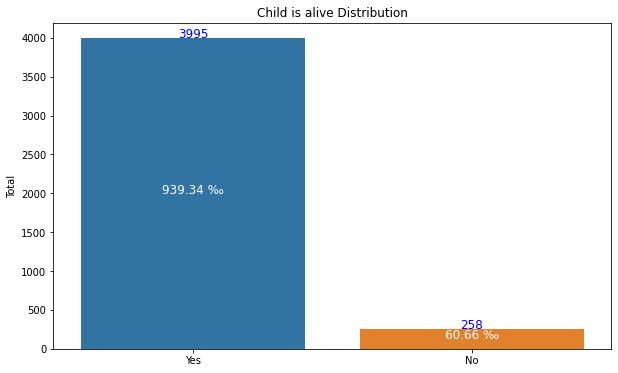

,Total,Per thousand
Yes,3995,939.336939
No,258,60.663061


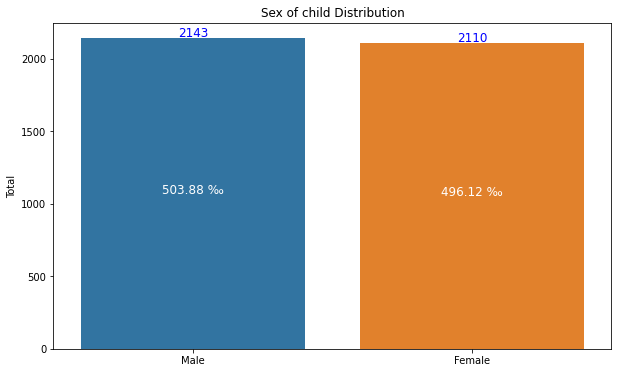

,Total,Per thousand
Male,2143,503.879614
Female,2110,496.120386


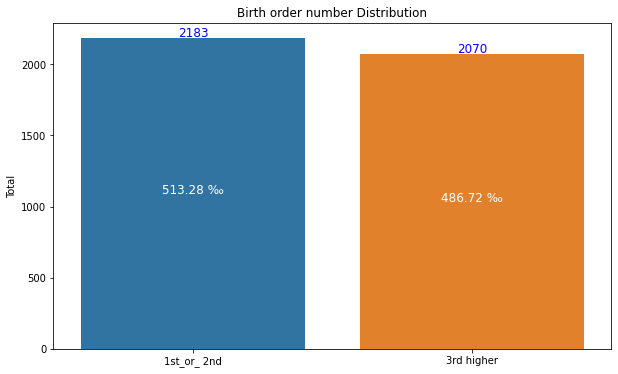

,Total,Per thousand
1st_or_ 2nd,2183,513.28474
3rd higher,2070,486.71526


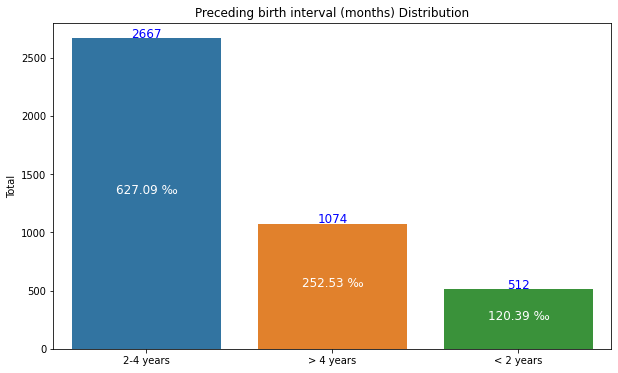

,Total,Per thousand
2-4 years,2667,627.086762
> 4 years,1074,252.527628
< 2 years,512,120.385610


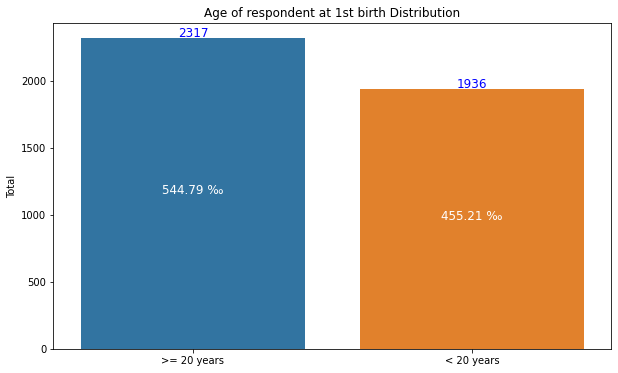

,Total,Per thousand
>= 20 years,2317,544.791912
< 20 years,1936,455.208088


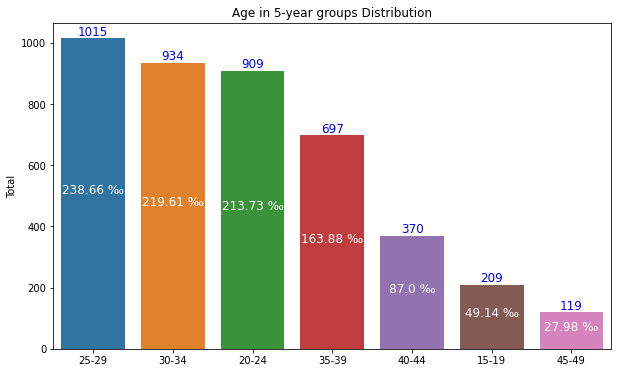

,Total,Per thousand
25-29,1015,238.655067
30-34,934,219.609687
20-24,909,213.731484
35-39,697,163.884317
40-44,370,86.997414
15-19,209,49.141782
45-49,119,27.980249


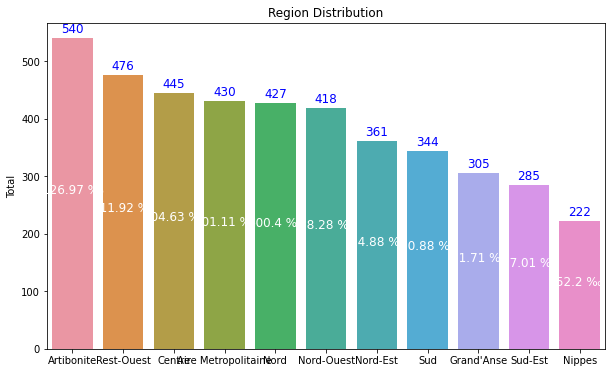

,Total,Per thousand
Artibonite,540,126.969198
Rest-Ouest,476,111.920997
Centre,445,104.632024
Aire Metropolitaine,430,101.105102
Nord,427,100.399718
Nord-Ouest,418,98.283565
Nord-Est,361,84.881260
Sud,344,80.884082
Grand'Anse,305,71.714084
Sud-Est,285,67.011521


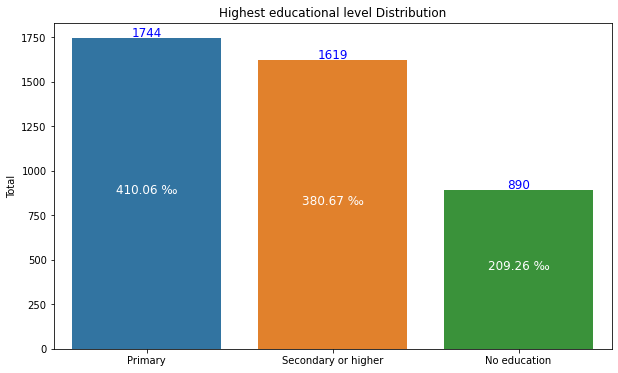

,Total,Per thousand
Primary,1744,410.063485
Secondary or higher,1619,380.672466
No education,890,209.264049


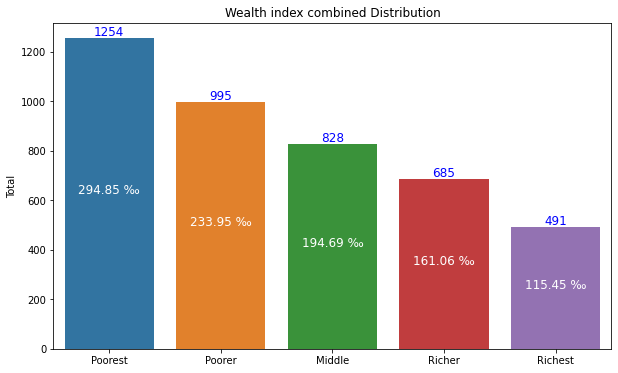

,Total,Per thousand
Poorest,1254,294.850694
Poorer,995,233.952504
Middle,828,194.686104
Richer,685,161.062779
Richest,491,115.447919


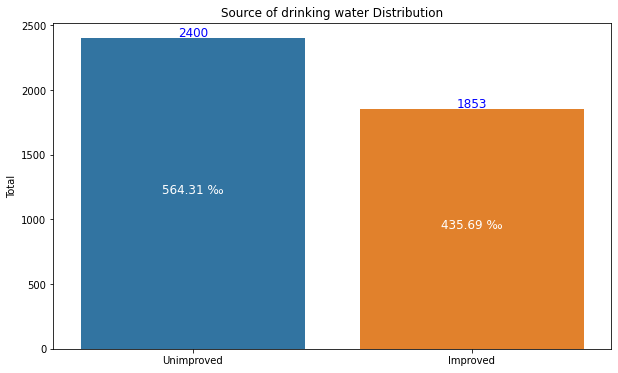

,Total,Per thousand
Unimproved,2400,564.307548
Improved,1853,435.692452


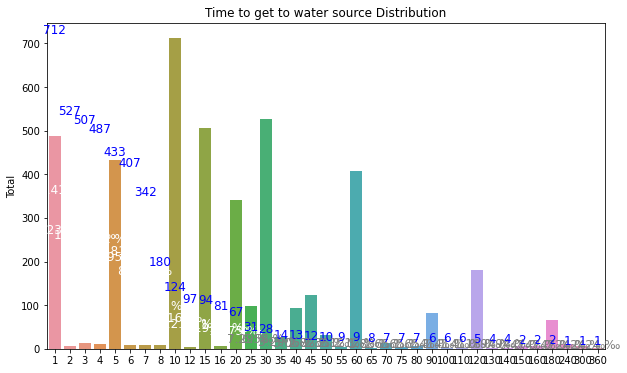

,Total,Per thousand
10,712,167.411239
30,527,123.912532
15,507,119.209969
1,487,114.507407
5,433,101.810487
60,407,95.697155
20,342,80.413826
120,180,42.323066
45,124,29.155890
25,97,22.807430


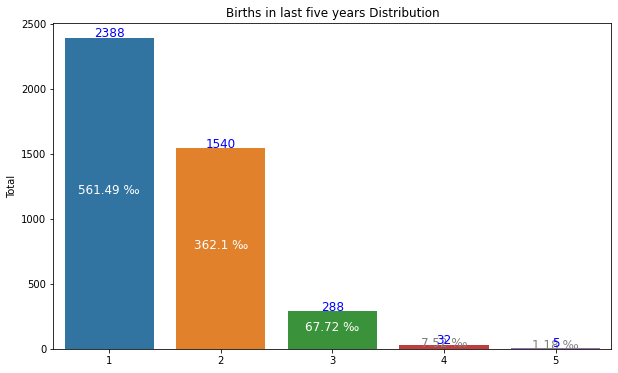

,Total,Per thousand
1,2388,561.486010
2,1540,362.097343
3,288,67.716906
4,32,7.524101
5,5,1.175641


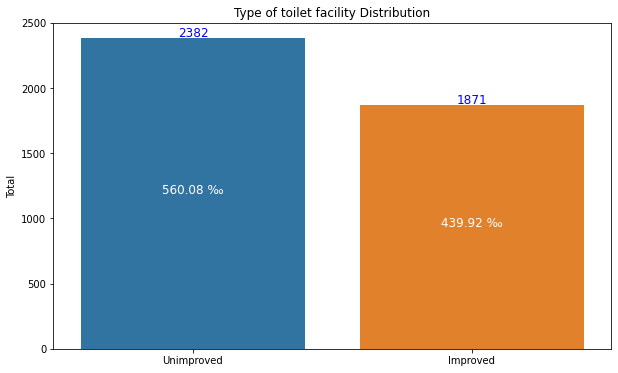

,Total,Per thousand
Unimproved,2382,560.075241
Improved,1871,439.924759


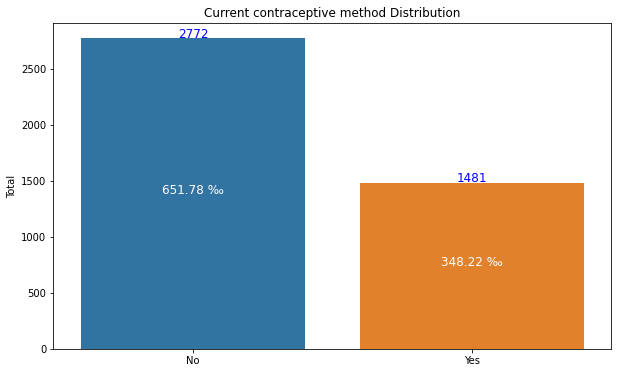

,Total,Per thousand
No,2772,651.775217
Yes,1481,348.224783


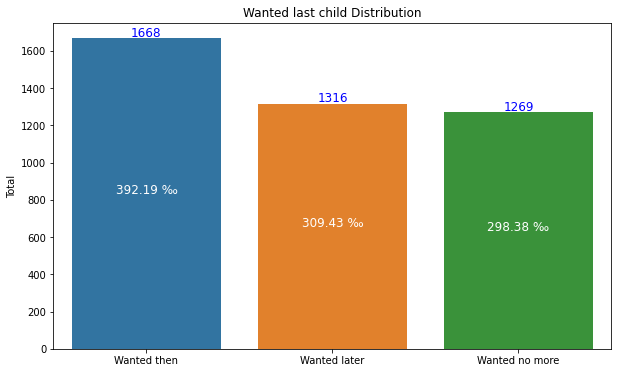

,Total,Per thousand
Wanted then,1668,392.193746
Wanted later,1316,309.428639
Wanted no more,1269,298.377616


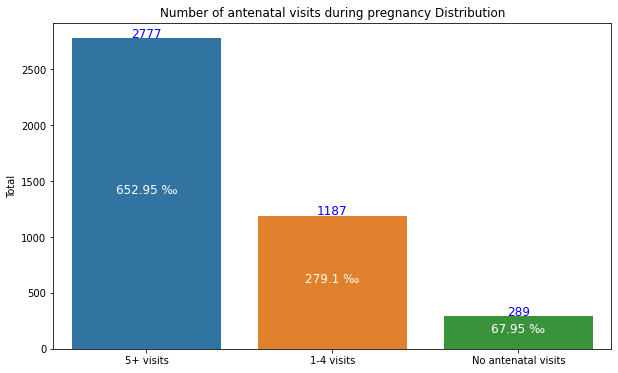

,Total,Per thousand
5+ visits,2777,652.950858
1-4 visits,1187,279.097108
No antenatal visits,289,67.952034


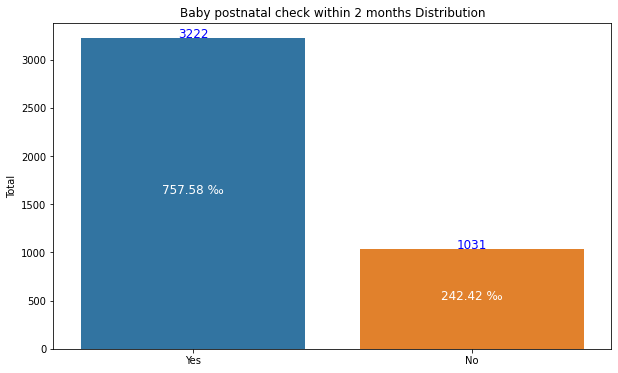

,Total,Per thousand
Yes,3222,757.582883
No,1031,242.417117


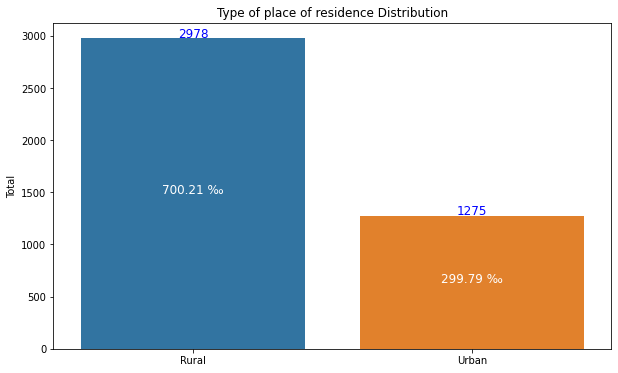

,Total,Per thousand
Rural,2978,700.211615
Urban,1275,299.788385


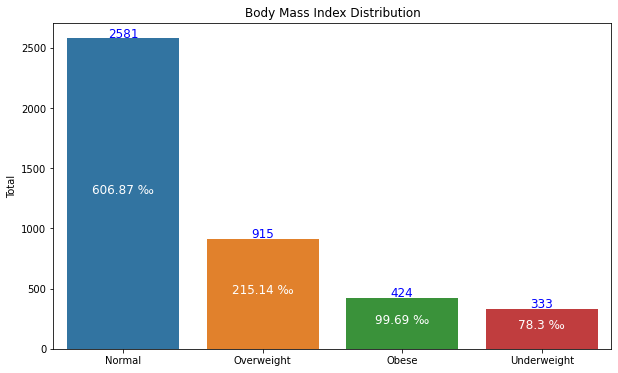

,Total,Per thousand
Normal,2581,606.865742
Overweight,915,215.142253
Obese,424,99.694333
Underweight,333,78.297672


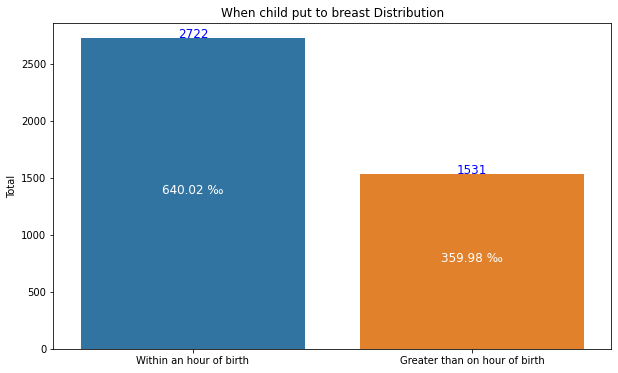

,Total,Per thousand
Within an hour of birth,2722,640.01881
Greater than on hour of birth,1531,359.98119


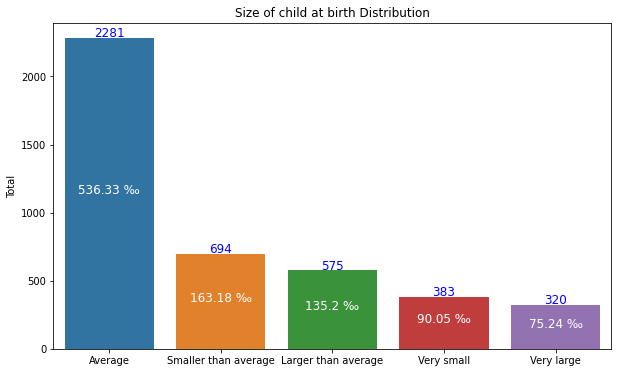

,Total,Per thousand
Average,2281,536.327298
Smaller than average,694,163.178933
Larger than average,575,135.198683
Very small,383,90.054079
Very large,320,75.241006


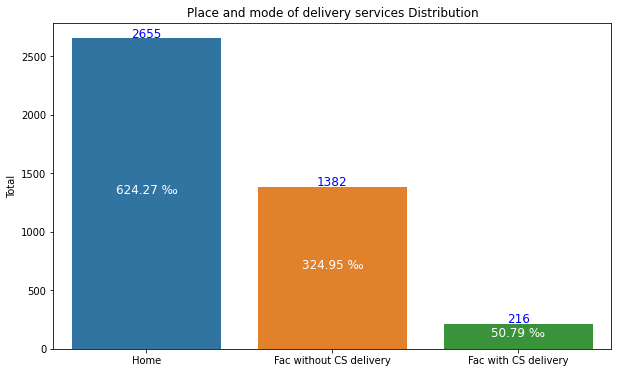

,Total,Per thousand
Home,2655,624.265225
Fac without CS delivery,1382,324.947096
Fac with CS delivery,216,50.787679


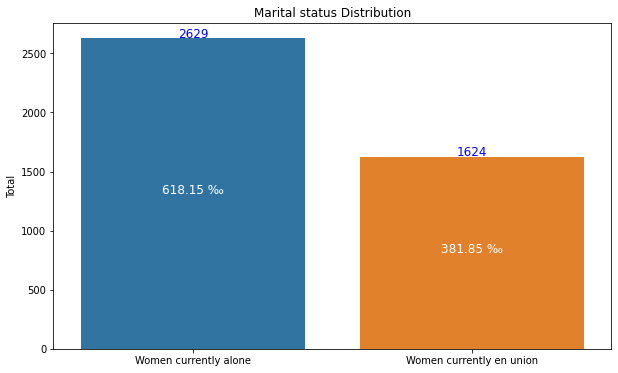

,Total,Per thousand
Women currently alone,2629,618.151893
Women currently en union,1624,381.848107


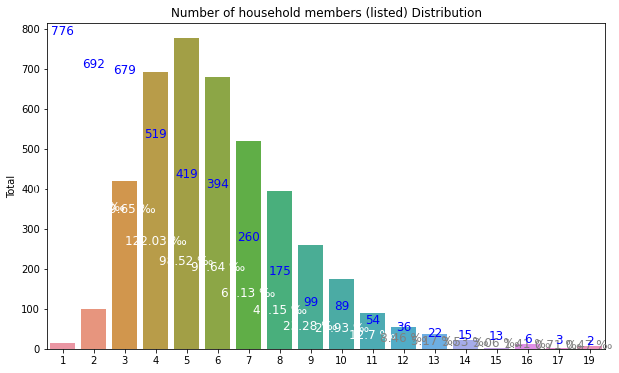

,Total,Per thousand
5,776,182.459440
4,692,162.708676
6,679,159.652010
7,519,122.031507
3,419,98.518693
8,394,92.640489
9,260,61.133318
10,175,41.147425
2,99,23.277686
11,89,20.926405


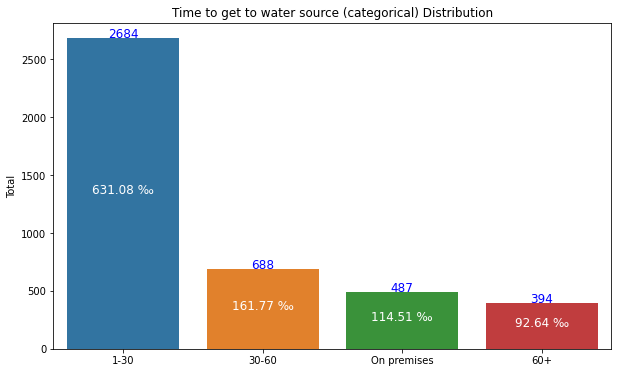

,Total,Per thousand
1-30,2684,631.083941
30-60,688,161.768164
On premises,487,114.507407
60+,394,92.640489


In [3948]:
for cat_col in category_colomns:
  result = prob_category(data = data_selected, col=cat_col, abs_value ="Total",rel_value ="Per thousand",show_plot=True,title=f"{cat_col} Distribution")
  display(result)

## Bivariate Analysis

#### A Chi-Square test is determined by a significant difference or relationship between two categorical variables from a single population. In general, this test assesses whether distributions of categorical variables differ from each other. It is also known as a Chi-Square goodness of fit test or a Chi-Square test for independence. A small value of the Chi-Square statistic means observed data fit with expected data, and a larger value of the Chi-Square statistic means observed data doesn't fit with expected data.

In [3949]:
data_selected = data_selected.reset_index()

In [3950]:
pd.crosstab(data_selected["Time to get to water source"], data_selected["Child is alive"], margins=True)

Child is alive,No,Yes,All
Time to get to water source,,,
1,26,461,487
2,1,5,6
3,0,13,13
4,0,10,10
5,25,408,433
6,0,8,8
7,1,8,9
8,1,8,9
10,42,670,712


In [3951]:
# We create a function to generate Pivot table, Chi-square tests & Bivariate BarPlot

categorical_var = ""
  
def my_chisqure_test(data=data_selected,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):

  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values = "Time to get to water source",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  
  

  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('We reject NULL HYPOTHESIS') 
    print(f"The two categorical variables are not independent—that is, {categorical_var} is not independent Whether the child is alive or not.")
  else: 
    print('We cannot reject NULL HYPOTHESIS') 
    print(f"The two categorical variables are independent—that is, {categorical_var} is independent Whether the child is alive or not.")

  # Force the aspect ratio of the blocks to be equal using "square" parameter


  
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('No'),ascending=True)
    ax =values.sort_values(by =('No'),ascending=True)[[('No'),('Yes')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel(f"{categorical_var}")
    xlab = ax.set_xlabel('Number chidren under five years old')
    title = ax.set_title(F"{categorical_var} according to whether the child is alive or not")

    index =0
    for No, Yes ,total in zip(values[('No')],values[('Yes')], values[('All')]):
      if No != total and  Yes != total  :
        ax.text(No/2 ,
                index,
                str(np.round((No/total)*1000,1)) + "‰",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(No + Yes/2 ,
              index,
              str(np.round((Yes/total)*1000,1)) + "‰",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif Yes == total:
        ax.text(Yes/2 ,
            index,
            str(np.round((Yes/total)*1000,1)) + "‰",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(No/2 ,
            index,
            str(np.round((No/total)*1000,1)) + "‰",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
  
    
      index+=1
  plt.show()
  #return result1












Child is alive,No,Yes,All
Sex of child,,,
Female,112,1998,2110
Male,146,1997,2143
All,258,3995,4253


p value: 0.3764019870768502
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Sex of child is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

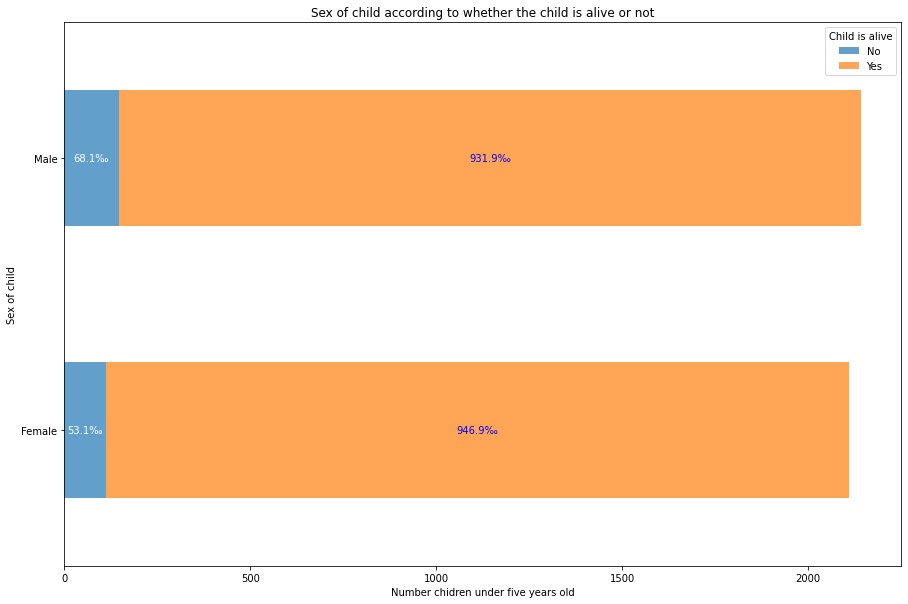

Child is alive,No,Yes,All
Birth order number,,,
1st_or_ 2nd,105,2078,2183
3rd higher,153,1917,2070
All,258,3995,4253


p value: 0.014455360417487758
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Birth order number is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

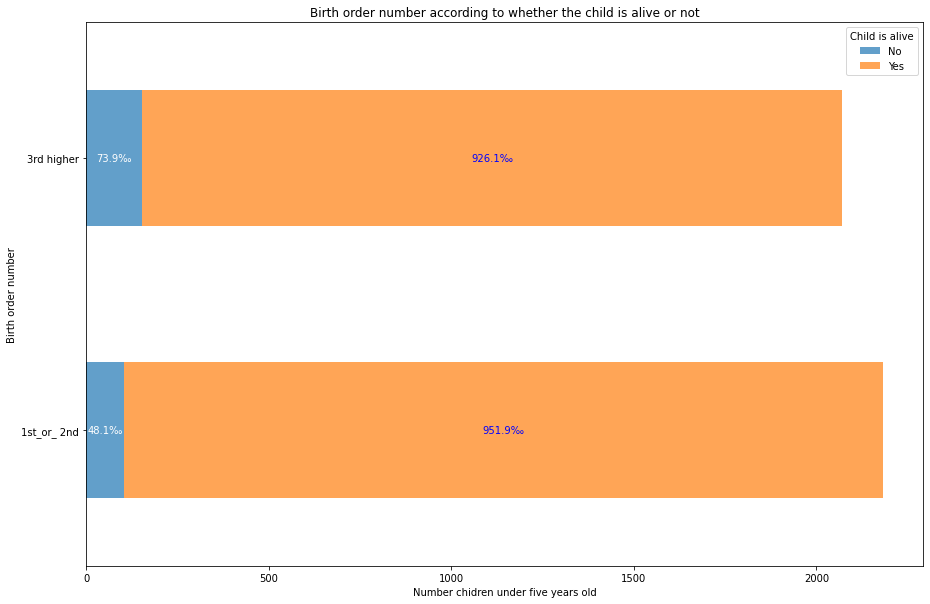

Child is alive,No,Yes,All
Preceding birth interval (months),,,
2-4 years,163,2504,2667
< 2 years,54,458,512
> 4 years,41,1033,1074
All,258,3995,4253


p value: 0.00011274809503338379
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Preceding birth interval (months) is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

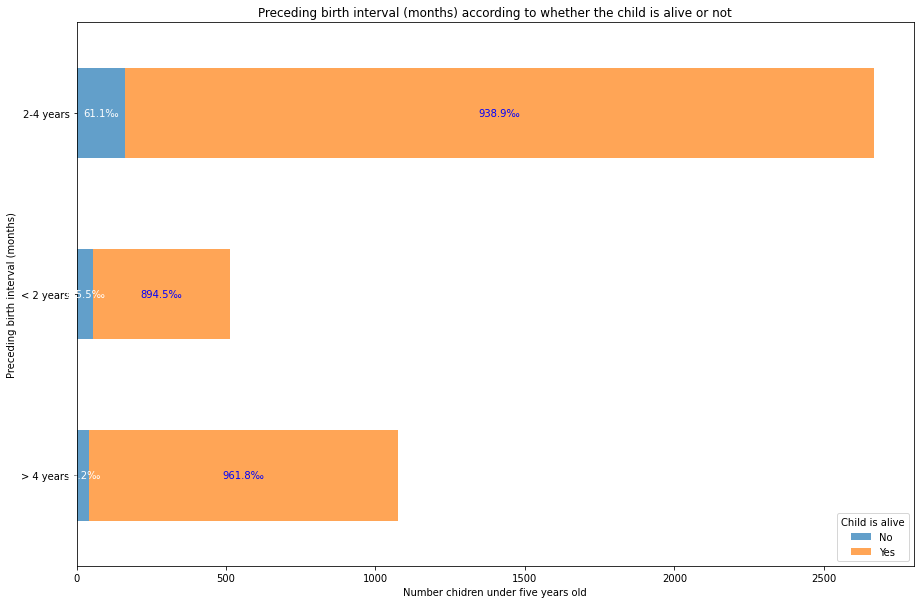

Child is alive,No,Yes,All
Age of respondent at 1st birth,,,
< 20 years,125,1811,1936
>= 20 years,133,2184,2317
All,258,3995,4253


p value: 0.9172757519531181
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Age of respondent at 1st birth is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

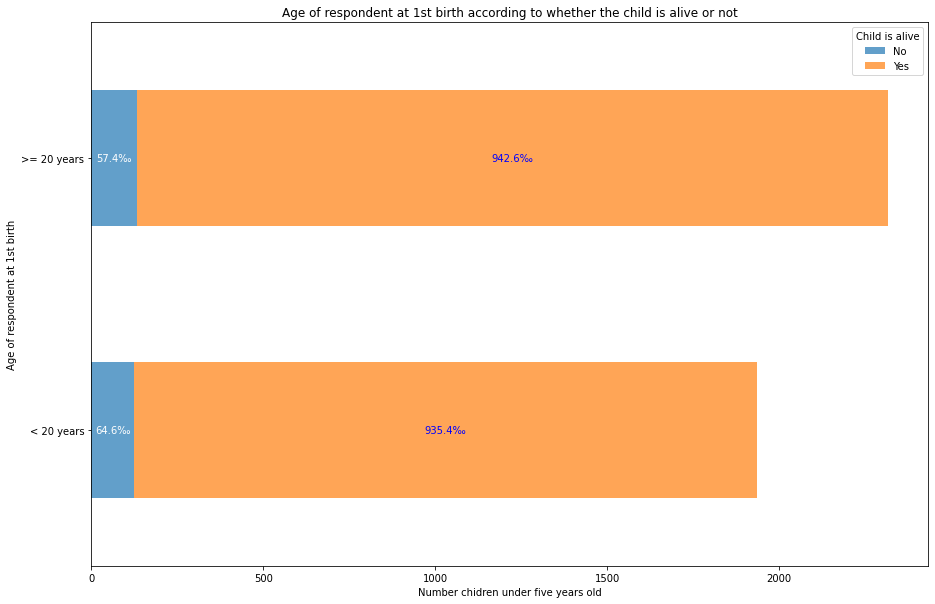

Child is alive,No,Yes,All
Age in 5-year groups,,,
15-19,16,193,209
20-24,47,862,909
25-29,48,967,1015
30-34,64,870,934
35-39,45,652,697
40-44,25,345,370
45-49,13,106,119
All,258,3995,4253


p value: 0.6200945989880697
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Age in 5-year groups is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

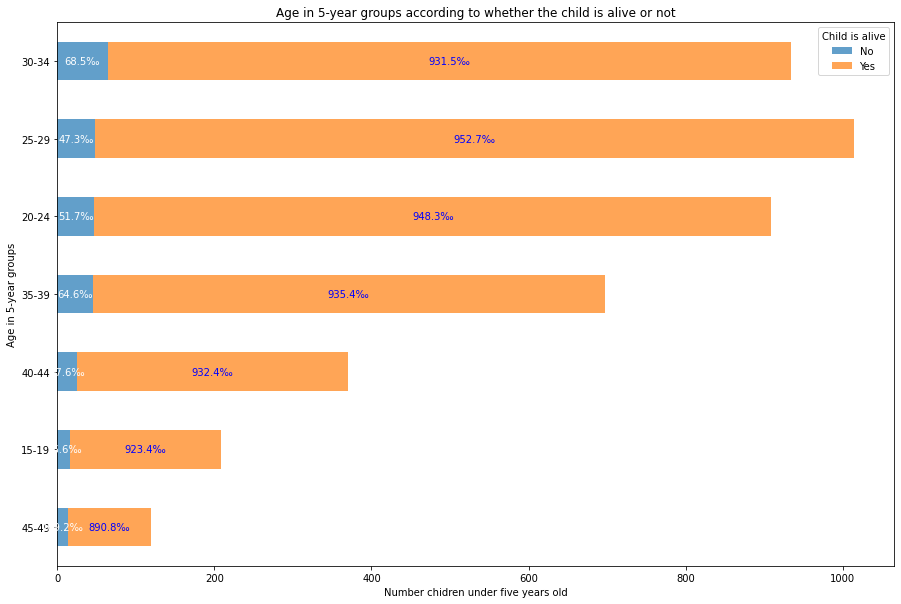

Child is alive,No,Yes,All
Region,,,
Aire Metropolitaine,33,397,430
Artibonite,31,509,540
Centre,32,413,445
Grand'Anse,7,298,305
Nippes,16,206,222
Nord,14,413,427
Nord-Est,20,341,361
Nord-Ouest,21,397,418
Rest-Ouest,49,427,476


p value: 0.03786859860791276
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Region is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

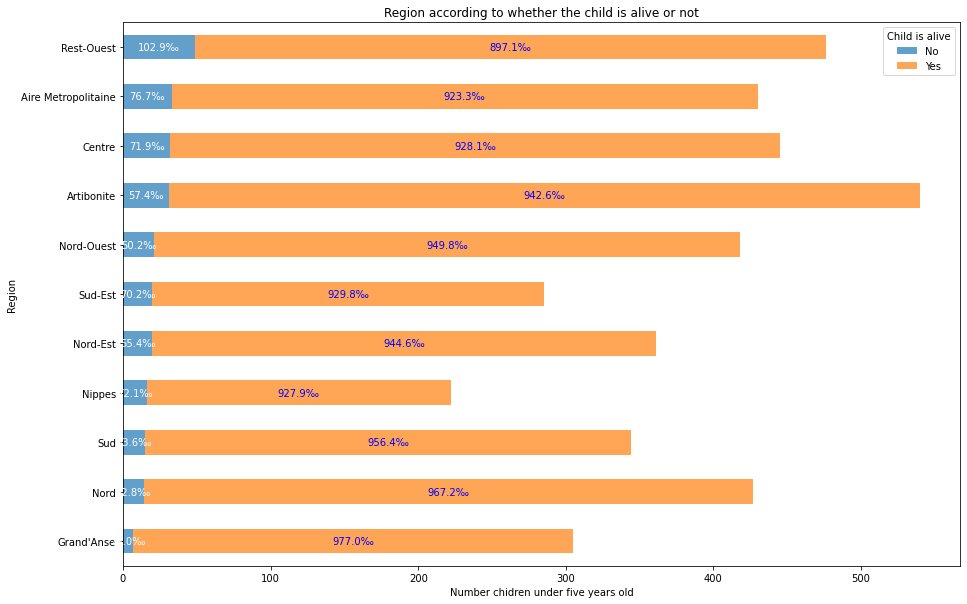

Child is alive,No,Yes,All
Highest educational level,,,
No education,63,827,890
Primary,115,1629,1744
Secondary or higher,80,1539,1619
All,258,3995,4253


p value: 0.41774326654556
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Highest educational level is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

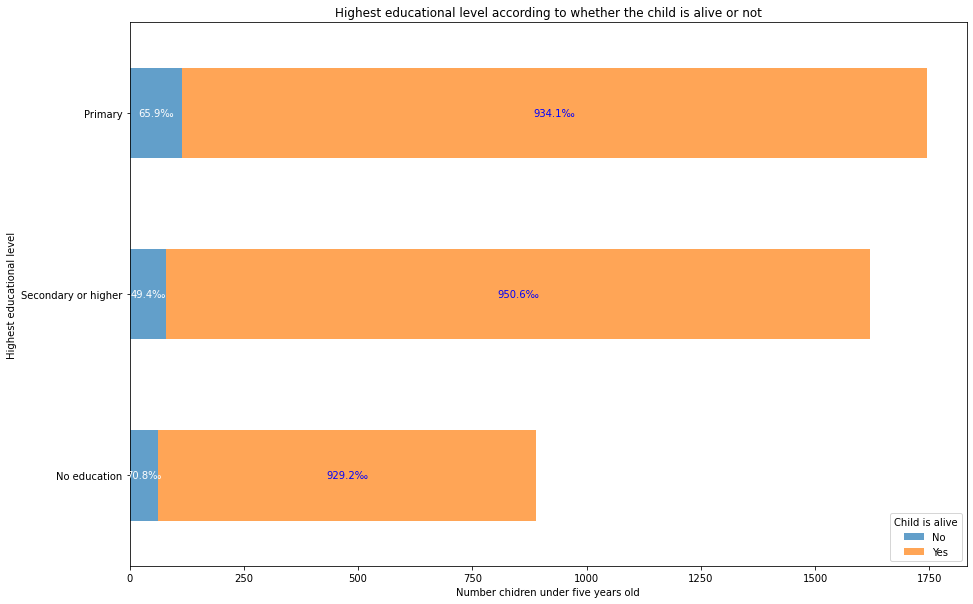

Child is alive,No,Yes,All
Wealth index combined,,,
Middle,46,782,828
Poorer,77,918,995
Poorest,76,1178,1254
Richer,38,647,685
Richest,21,470,491
All,258,3995,4253


p value: 0.5951549643528334
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Wealth index combined is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

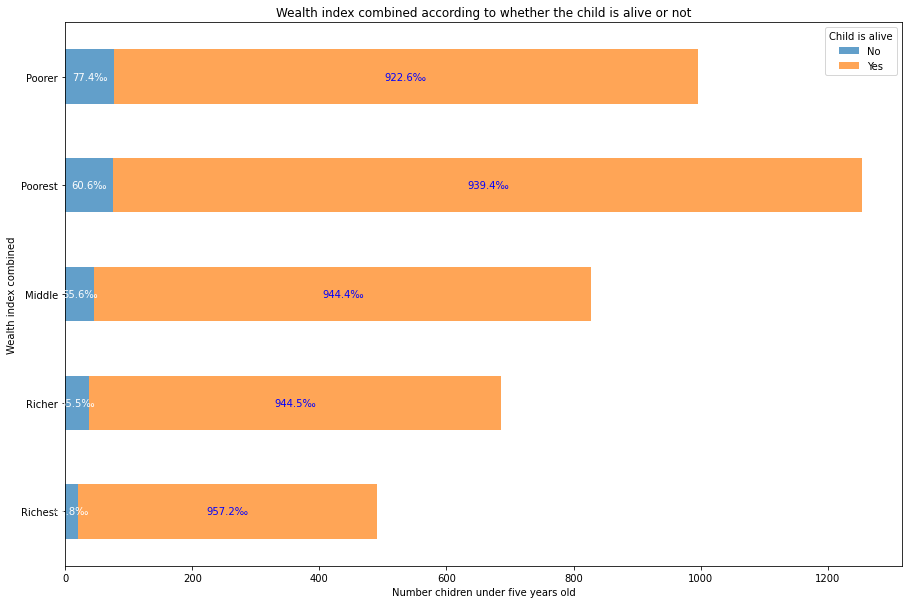

Child is alive,No,Yes,All
Source of drinking water,,,
Improved,114,1739,1853
Unimproved,144,2256,2400
All,258,3995,4253


p value: 0.9997773878991668
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Source of drinking water is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

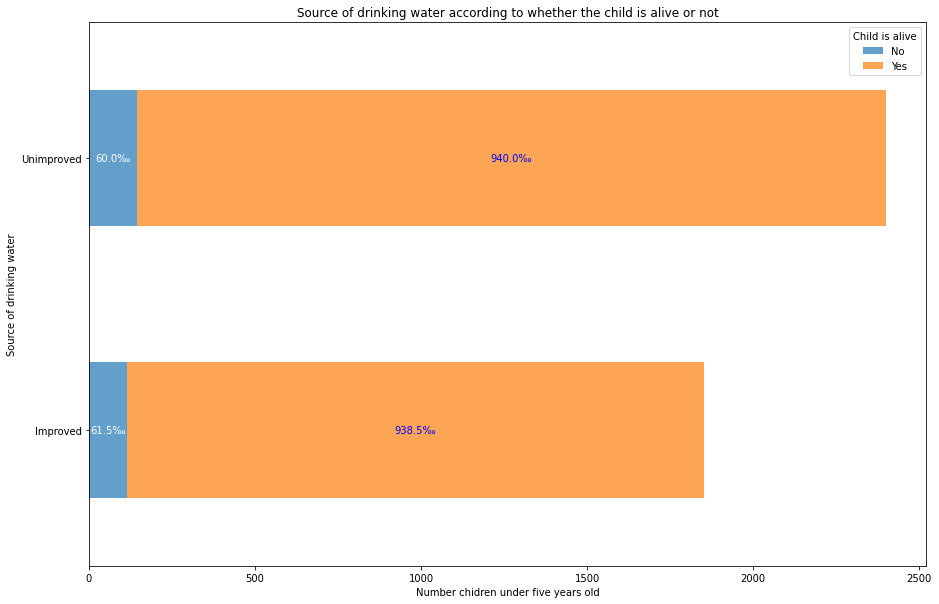

Child is alive,No,Yes,All
Births in last five years,,,
1,95,2293,2388
2,113,1427,1540
3,39,249,288
4,10,22,32
5,1,4,5
All,258,3995,4253


p value: 1.2159550967157142e-14
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Births in last five years is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

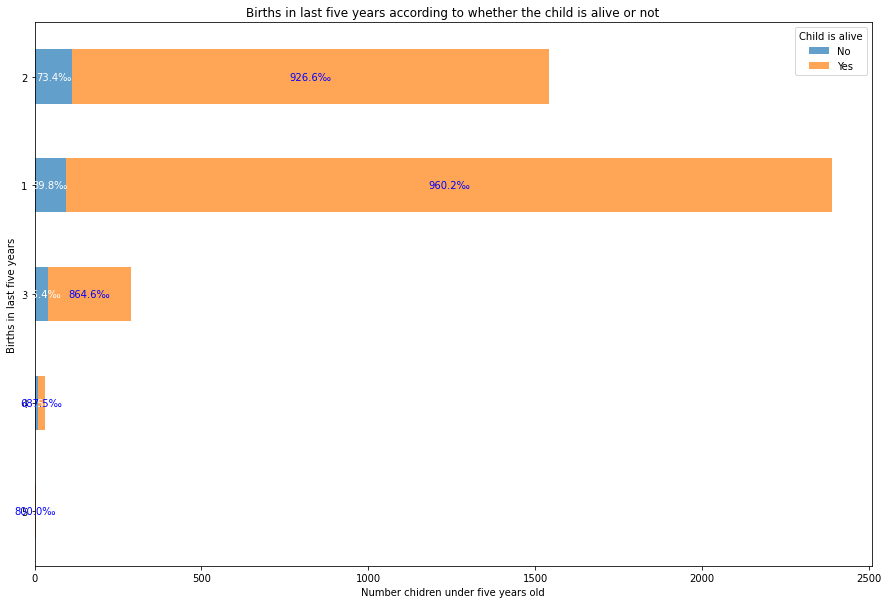

Child is alive,No,Yes,All
Type of toilet facility,,,
Improved,101,1770,1871
Unimproved,157,2225,2382
All,258,3995,4253


p value: 0.6238239292869768
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Type of toilet facility is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

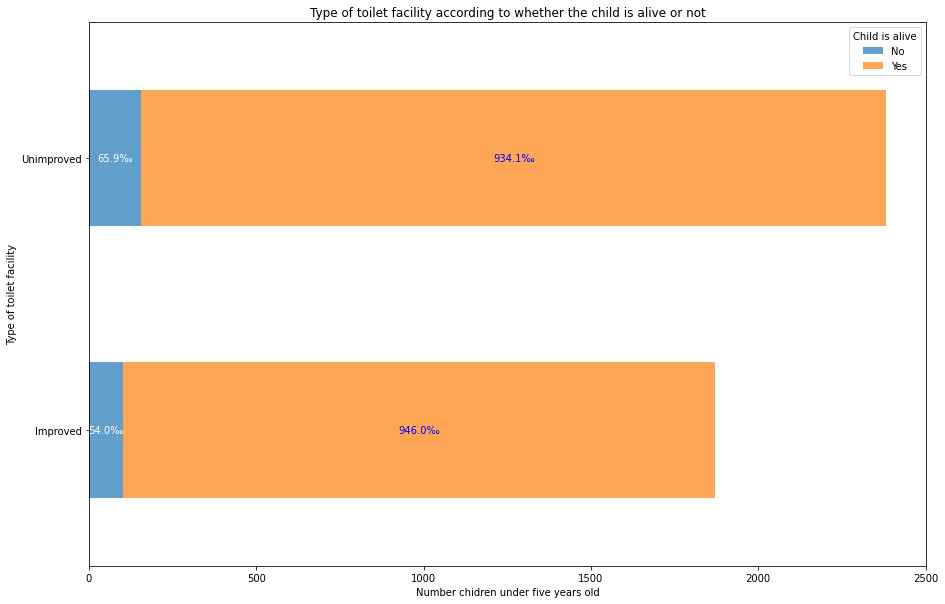

Child is alive,No,Yes,All
Current contraceptive method,,,
No,200,2572,2772
Yes,58,1423,1481
All,258,3995,4253


p value: 0.0010152624460687569
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Current contraceptive method is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

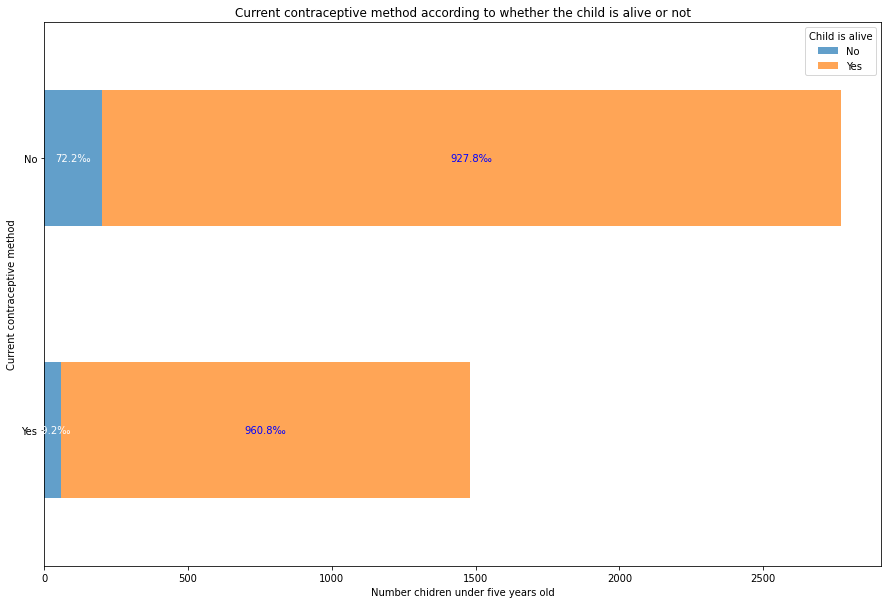

Child is alive,No,Yes,All
Wanted last child,,,
Wanted later,70,1246,1316
Wanted no more,81,1188,1269
Wanted then,107,1561,1668
All,258,3995,4253


p value: 0.9314117237328549
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Wanted last child is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

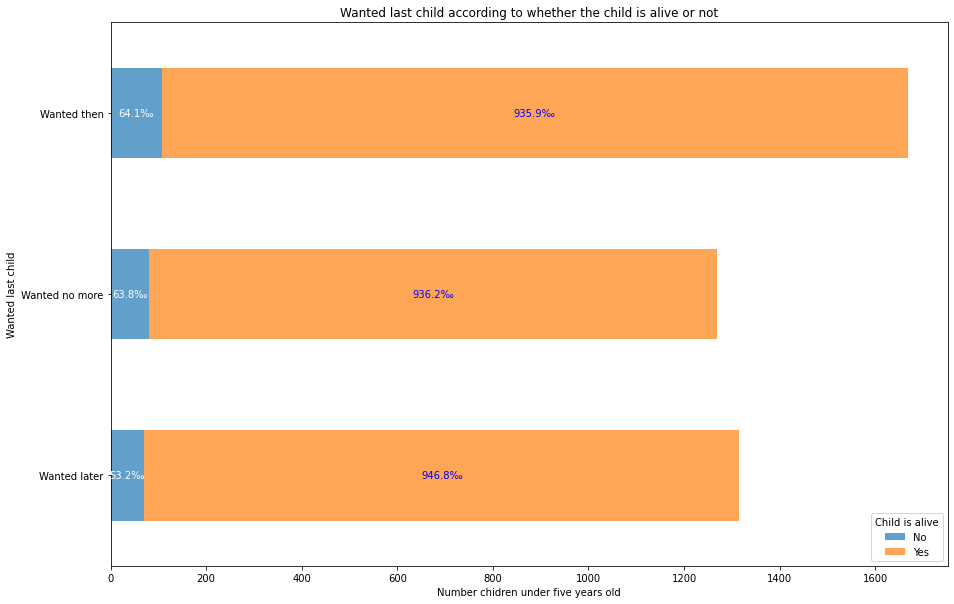

Child is alive,No,Yes,All
Number of antenatal visits during pregnancy,,,
1-4 visits,60,1127,1187
5+ visits,171,2606,2777
No antenatal visits,27,262,289
All,258,3995,4253


p value: 0.2676029904144297
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Number of antenatal visits during pregnancy is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

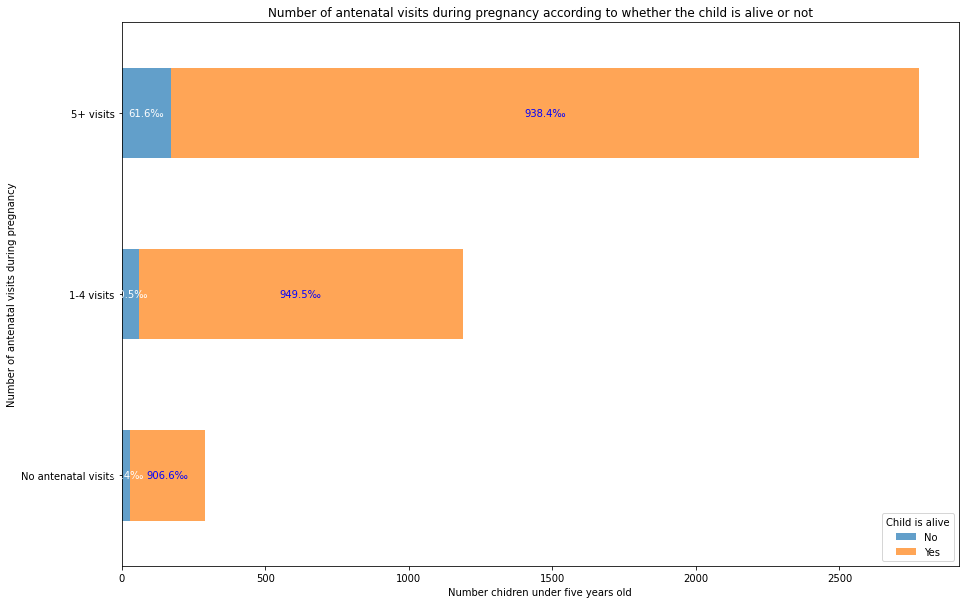

Child is alive,No,Yes,All
Baby postnatal check within 2 months,,,
No,79,952,1031
Yes,179,3043,3222
All,258,3995,4253


p value: 0.19291647640047993
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Baby postnatal check within 2 months is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

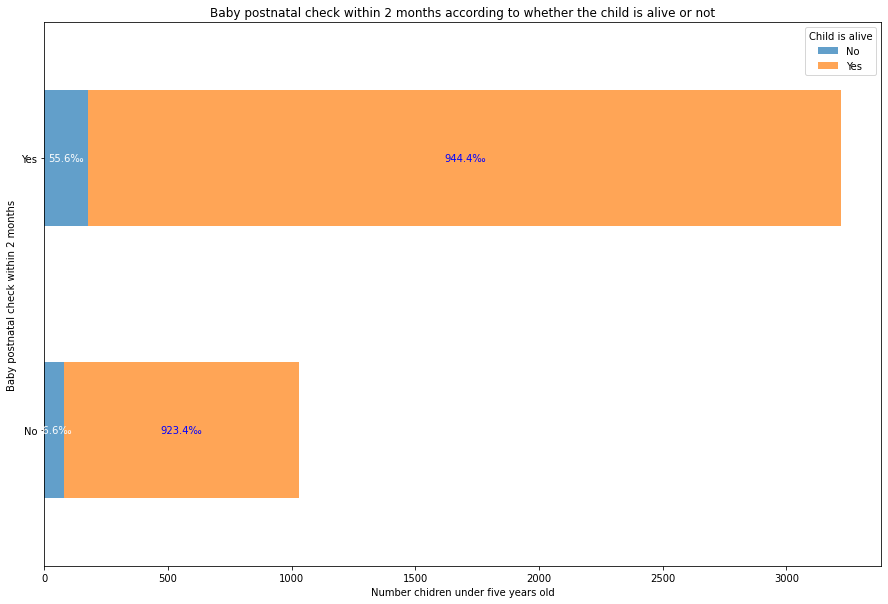

Child is alive,No,Yes,All
Type of place of residence,,,
Rural,178,2800,2978
Urban,80,1195,1275
All,258,3995,4253


p value: 0.9977094537785145
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Type of place of residence is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

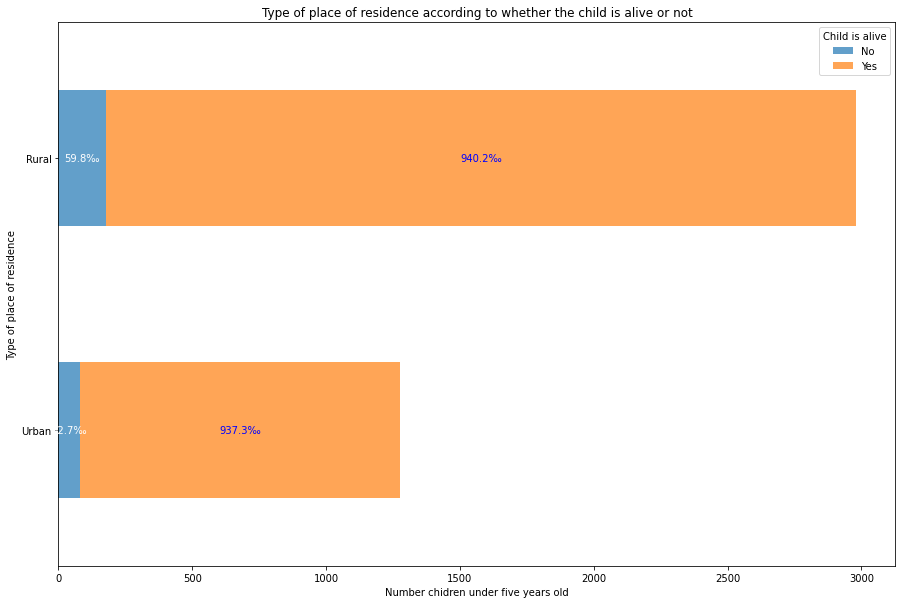

Child is alive,No,Yes,All
Body Mass Index,,,
Normal,157,2424,2581
Obese,20,404,424
Overweight,54,861,915
Underweight,27,306,333
All,258,3995,4253


p value: 0.8716264979560894
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Body Mass Index is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

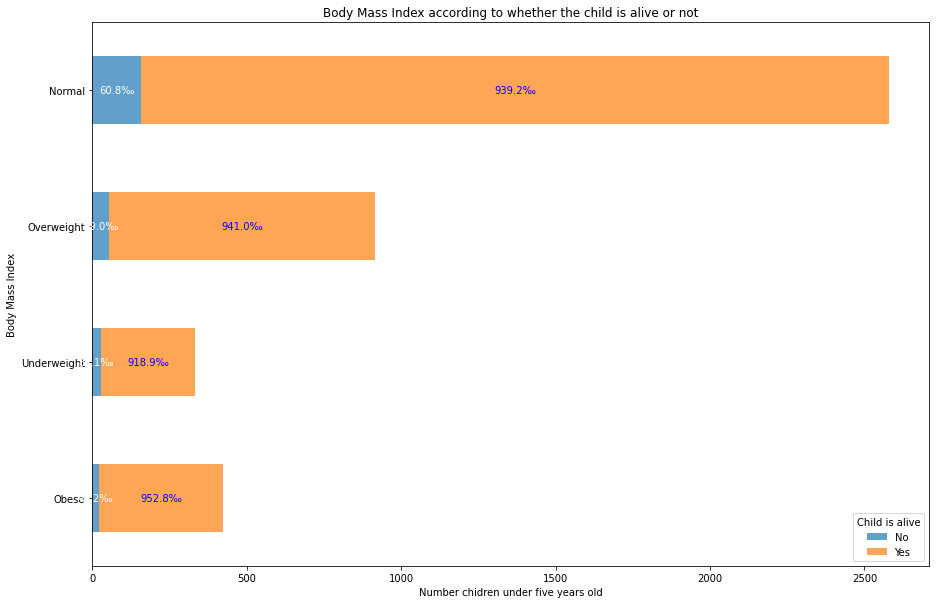

Child is alive,No,Yes,All
When child put to breast,,,
Greater than on hour of birth,123,1408,1531
Within an hour of birth,135,2587,2722
All,258,3995,4253


p value: 0.002697681772082231
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, When child put to breast is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

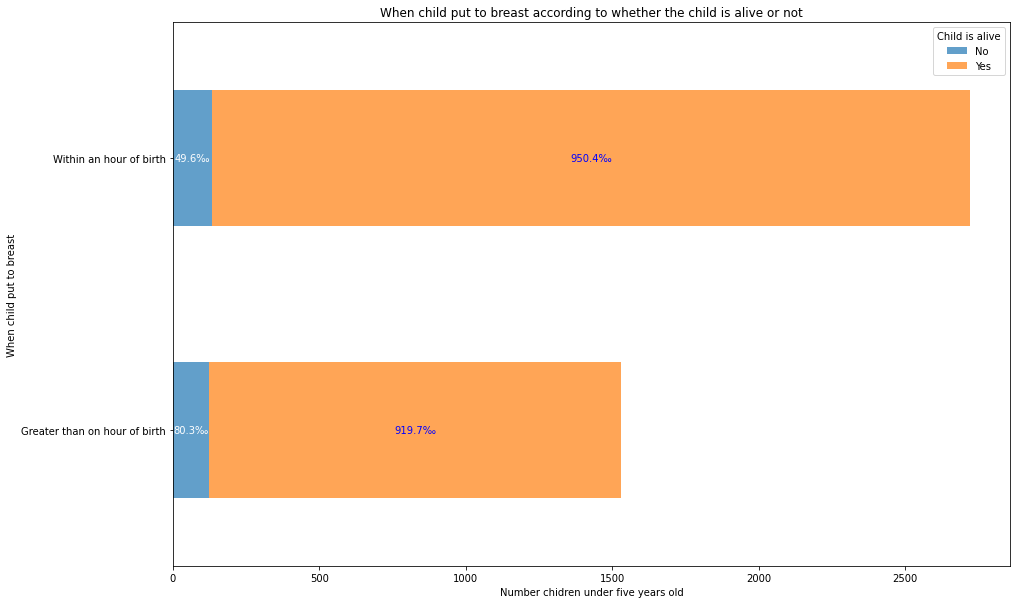

Child is alive,No,Yes,All
Size of child at birth,,,
Average,133,2148,2281
Larger than average,31,544,575
Smaller than average,40,654,694
Very large,18,302,320
Very small,36,347,383
All,258,3995,4253


p value: 0.5927343004584051
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Size of child at birth is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

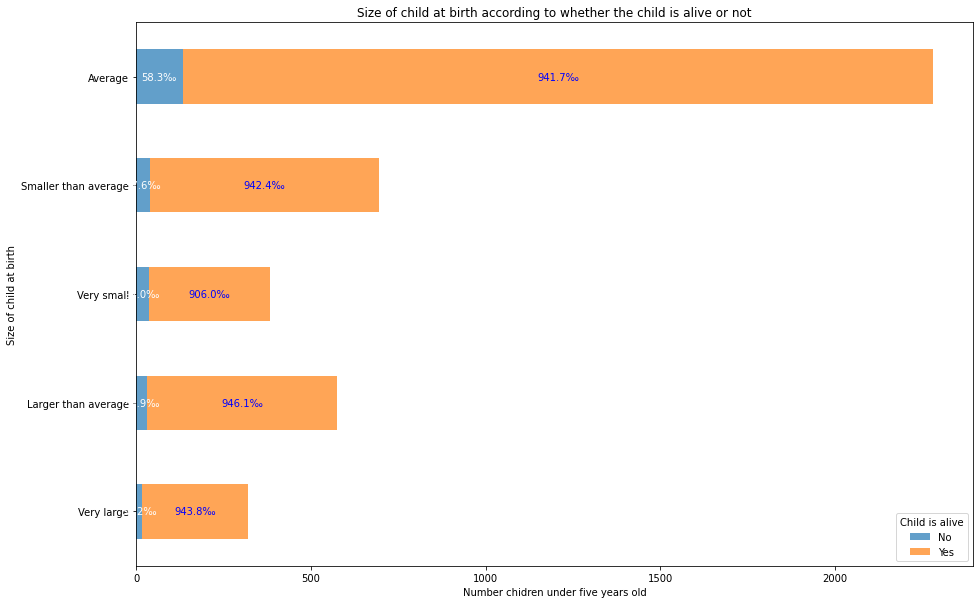

Child is alive,No,Yes,All
Place and mode of delivery services,,,
Fac with CS delivery,9,207,216
Fac without CS delivery,65,1317,1382
Home,184,2471,2655
All,258,3995,4253


p value: 0.15474839843027693
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Place and mode of delivery services is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

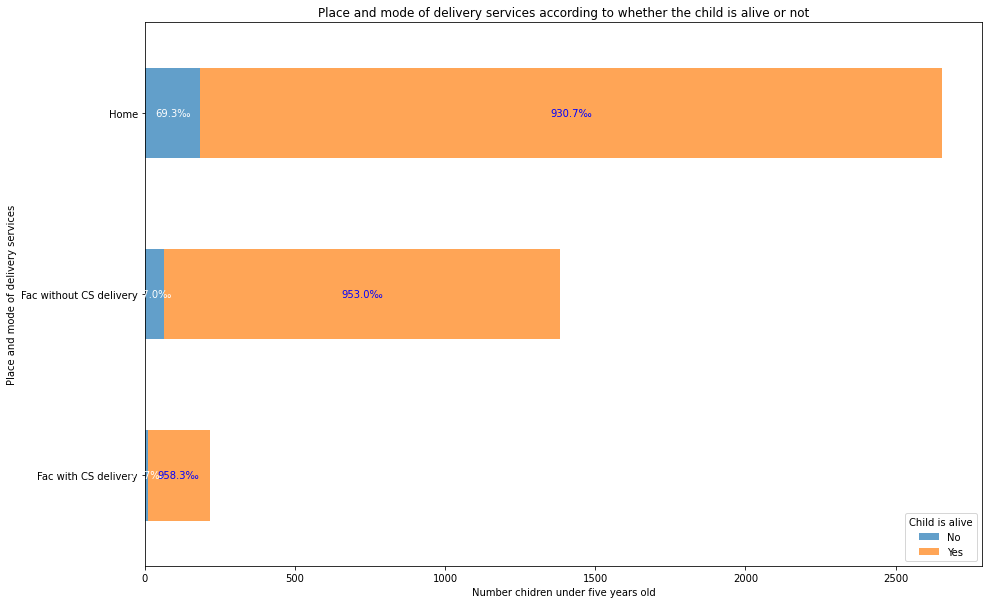

Child is alive,No,Yes,All
Marital status,,,
Women currently alone,168,2461,2629
Women currently en union,90,1534,1624
All,258,3995,4253


p value: 0.8667770662399734
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Marital status is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

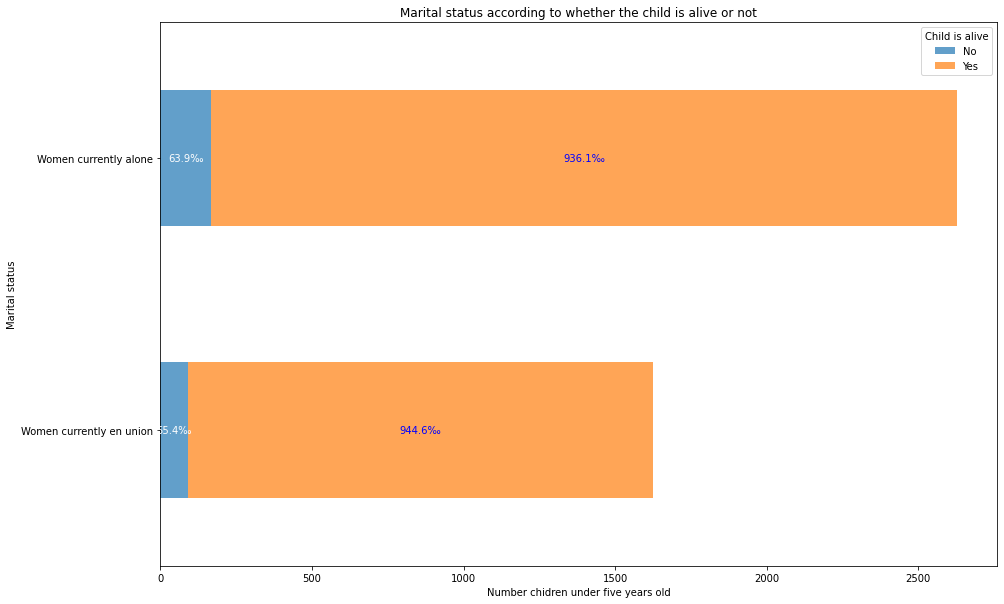

Child is alive,No,Yes,All
Number of household members (listed),,,
1,2,13,15
2,19,80,99
3,37,382,419
4,37,655,692
5,52,724,776
6,39,640,679
7,25,494,519
8,16,378,394
9,16,244,260


p value: 0.04420770505175331
We reject NULL HYPOTHESIS
The two categorical variables are not independent—that is, Number of household members (listed) is not independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

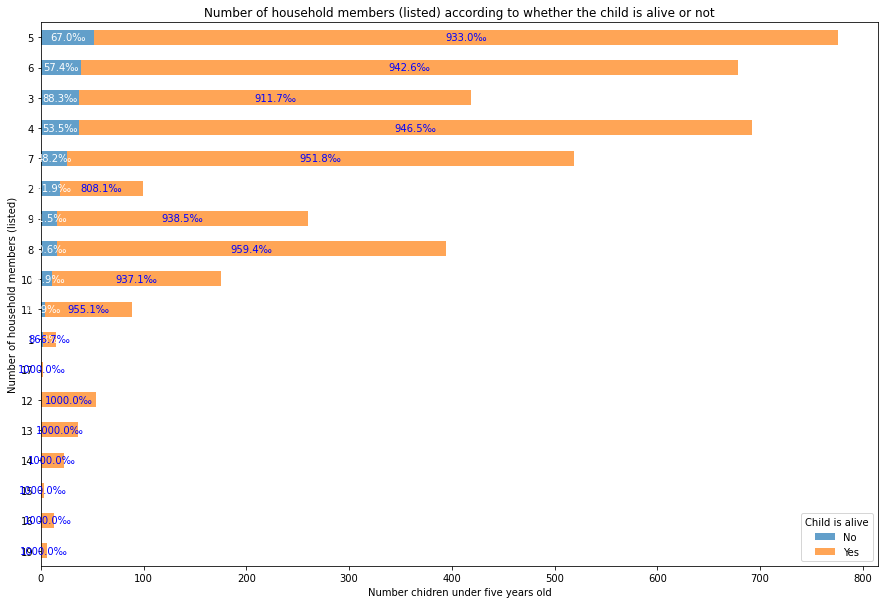

Child is alive,No,Yes,All
Time to get to water source (categorical),,,
1-30,159,2525,2684
30-60,40,648,688
60+,33,361,394
On premises,26,461,487
All,258,3995,4253


p value: 0.8279324311587977
We cannot reject NULL HYPOTHESIS
The two categorical variables are independent—that is, Time to get to water source (categorical) is independent Whether the child is alive or not.


<Figure size 360x1080 with 0 Axes>

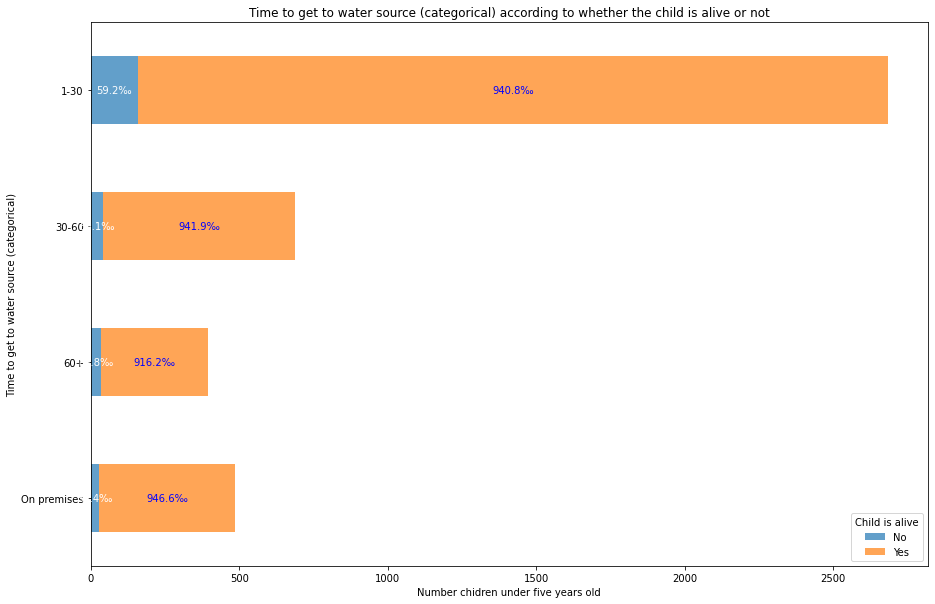

In [3952]:

chiSquareVar = ["Sex of child", "Birth order number", "Preceding birth interval (months)", "Age of respondent at 1st birth", "Age in 5-year groups", "Region", "Highest educational level", "Wealth index combined", "Source of drinking water", "Births in last five years", "Type of toilet facility", "Current contraceptive method", "Wanted last child", "Number of antenatal visits during pregnancy", "Baby postnatal check within 2 months", "Type of place of residence", "Body Mass Index", "When child put to breast", "Size of child at birth", "Place and mode of delivery services", "Marital status", "Number of household members (listed)", "Time to get to water source (categorical)"]


for categorical_var in chiSquareVar:
    my_chisqure_test(data_selected,columns=[f"{categorical_var}", "Child is alive"],significance_level=0.05,figsize=(5,15),heatmap=False)






### Multivariate Analysis

### Others insights

### Machine Learning

In [ ]:
# Dummy encoding

In [ ]:
feature_set = []

In [3953]:
#data_selected['Preceding birth interval (months)'].quantile([0,0.2,0.4,0.6,0.8,1])

In [3954]:
MortalityUnderFive = data_selected["Child is alive"] == "No"
death_children =data_selected[MortalityUnderFive]
death_children.isna().sum()

index                                          0
Educational attainment                         0
Number of antenatal visits during pregnancy    0
Age in 5-year groups                           0
Age at death                                   0
                                              ..
Birth weight in kilograms (3 decimals)         0
Source of drinking water                       0
Number of household members (listed)           0
Time to get to water source (categorical)      0
Place and mode of delivery services            0
Length: 61, dtype: int64

In [3955]:
null = data_selected.isnull().sum(axis=1)
null.value_counts()

2    3304
4     471
3     408
5      50
6      20
dtype: int64

In [3956]:
data_selected.loc[null>0].T

,0,1,2,3,4,5,6,7,8,9,...,4243,4244,4245,4246,4247,4248,4249,4250,4251,4252
index,1,2,3,4,5,7,8,10,11,12,...,6517,6518,6521,6522,6523,6524,6525,6526,6528,6529
Educational attainment,Complete primary,Complete primary,Complete primary,Complete primary,Complete primary,Higher,Incomplete secondary,Incomplete secondary,Incomplete secondary,Incomplete secondary,...,Incomplete primary,Incomplete primary,Incomplete primary,Incomplete primary,Higher,Incomplete primary,Complete secondary,No education,Incomplete secondary,Higher
Number of antenatal visits during pregnancy,5+ visits,5+ visits,1-4 visits,5+ visits,5+ visits,5+ visits,5+ visits,1-4 visits,5+ visits,5+ visits,...,1-4 visits,5+ visits,5+ visits,5+ visits,5+ visits,No antenatal visits,5+ visits,No antenatal visits,5+ visits,5+ visits
Age in 5-year groups,35-39,35-39,30-34,30-34,30-34,35-39,35-39,25-29,25-29,35-39,...,35-39,35-39,30-34,30-34,30-34,45-49,20-24,40-44,25-29,25-29
Age at death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Birth weight in kilograms (3 decimals),Not weighed at birth,Not weighed at birth,Not weighed at birth,Not weighed at birth,Not weighed at birth,Not weighed at birth,5000,Not weighed at birth,Not weighed at birth,4000,...,Not weighed at birth,Not weighed at birth,Not weighed at birth,Not weighed at birth,4100,Not weighed at birth,Not weighed at birth,2500,2400,2600
Source of drinking water,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,Improved,...,Unimproved,Unimproved,Unimproved,Unimproved,Unimproved,Improved,Improved,Unimproved,Unimproved,Unimproved
Number of household members (listed),7,7,4,4,4,5,6,5,5,7,...,6,6,7,7,4,8,8,4,4,4
Time to get to water source (categorical),1-30,1-30,1-30,1-30,1-30,On premises,On premises,On premises,On premises,On premises,...,60+,60+,1-30,1-30,On premises,1-30,1-30,1-30,1-30,On premises


In [3957]:
data_selected.set_index("Case Identification", inplace = True)

KeyError: "None of ['Case Identification'] are in the columns"

In [ ]:
# Shapiro test

def testnormality(var, df):
    stat, p = scistat.shapiro(df[var])
    return p

testnormality("Number of children 5 and under in household (de jure)", data_selected)


0.0

In [ ]:
#data_selected.value_counts()

In [ ]:
#data_selected['Age at death (months, imputed)'].unique.valuecounts()

In [ ]:
PCA_variable = data[["Household has: television", "Household has: refrigerator", "Household has: bicycle", "Main floor material", "Type of toilet facility", "Source of drinking water"]]


In [ ]:
PCA_variable.head(10)

,Household has: television,Household has: refrigerator,Household has: bicycle,Main floor material,Type of toilet facility,Source of drinking water
0,No,No,No,Cement/Concrete,No facility/bush/field,Piped into dwelling
1,No,No,No,Earth/sand,Pit latrine with slab,Public tap/standpipe
2,No,No,No,Earth/sand,Pit latrine with slab,Public tap/standpipe
3,No,No,No,Cement/Concrete,No facility/bush/field,Public tap/standpipe
4,No,No,No,Cement/Concrete,No facility/bush/field,Public tap/standpipe
5,No,No,No,Cement/Concrete,No facility/bush/field,Public tap/standpipe
6,No,No,Yes,Earth/sand,Pit latrine without slab/open pit,Piped into dwelling
7,No,No,No,Cement/Concrete,Pit latrine with slab,Piped to yard/plot
8,No,No,No,Cement/Concrete,Pit latrine without slab/open pit,Piped to yard/plot
9,No,No,No,Cement/Concrete,Pit latrine with slab,Piped to neighbor


In [ ]:
PCA_variable["Household has: television"].replace({"No": 0, "Yes": 1, "Not a dejure resident": 0, "Missing" : 0}, inplace = True)
PCA_variable["Household has: refrigerator"].replace({"No": 0, "Yes": 1, "Not a dejure resident": 0, "Missing" : 0}, inplace = True)
PCA_variable["Household has: bicycle"].replace({"No": 0, "Yes": 1, "Not a dejure resident": 0, "Missing" : 0}, inplace = True)
PCA_variable["Type of toilet facility"].replace({"FLUSH TOILET": 3, "Flush to piped sewer system":3, "Flush to septic tank":3, "Flush to pit latrine":3, "Flush to somewhere else":3, "Flush, don't know where":3, "PIT TOILET LATRINE":2, "Ventilated Improved Pit latrine (VIP)":2, "Pit latrine with slab":2, "Pit latrine without slab/open pit":2, "NO FACILITY":1, "No facility/bush/field":1, "Composting toilet":1, "Bucket toilet":1, "Hanging toilet/latrine":1, "Other":1, "Not a dejure resident":0, "Missing" : 0},   inplace = True)
PCA_variable["Main floor material"].replace({"Missing":0, "Not a dejure resident":0, "FINISHED":3, "Parquet or polished wood":3,"Cement/Concrete":3, "Mosaic/Ceramic":3, "Other": 3, "RUDIMENTARY":2, "Wood planks": 2, "NATURAL":1, "Earth/sand":1, "Dung": 1}, inplace = True)
PCA_variable["Source of drinking water"].replace({"PIPED WATER":4,"Piped into dwelling":4,"Piped to yard/plot":4,"Piped to neighbor":4,"Public tap/standpipe":4,"TUBE WELL WATER":3,"Tube well or borehole":3,"DUG WELL (OPEN/PROTECTED)":2, "Protected well":2,"Unprotected well":2,"SURFACE FROM SPRING":1,"Protected spring":1,"Unprotected spring":1,"River/dam/lake/ponds/stream/canal/irrigation channel":1,"Rainwater":1, "Tanker truck":1, "Cart with small tank":1, "Bottled water":1, "Water selling kiosk/company":1, "Other":1, "Not a dejure resident":0, "Missing":0}, inplace = True)

C:\Users\bootcamp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
PCA_variable.head()

,Household has: television,Household has: refrigerator,Household has: bicycle,Main floor material,Type of toilet facility,Source of drinking water
0,0,0,0,3,1,4
1,0,0,0,1,2,4
2,0,0,0,1,2,4
3,0,0,0,3,1,4
4,0,0,0,3,1,4


In [ ]:
# Standardize the Data

from sklearn.preprocessing import StandardScaler

# Separating out the PCA_variable
x = PCA_variable.values

# Standardizing the PCA_variable
x = StandardScaler().fit_transform(x)



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component'])

In [ ]:
principalDf

,principal component
0,-0.400852
1,-0.539550
2,-0.539550
3,-0.400852
4,-0.400852
...,...
6525,0.396168
6526,2.384843
6527,4.131276
6528,2.384843
